In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from lazypredict.Supervised import LazyClassifier

In [55]:
data = pd.read_csv("fraud_oracle.csv")
data.head(5)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [56]:
print('Number of duplicates:', data.duplicated().sum() )
#there is no duplicated data

Number of duplicates: 0


In [57]:
data.notnull()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0       True         True       True  True          True              True   
1       True         True       True  True          True              True   
2       True         True       True  True          True              True   
3       True         True       True  True          True              True   
4       True         True       True  True          True              True   
...      ...          ...        ...   ...           ...               ...   
15415   True         True       True  True          True              True   
15416   True         True       True  True          True              True   
15417   True         True       True  True          True              True   
15418   True         True       True  True          True              True   
15419   True         True       True  True          True              True   

       MonthClaimed  WeekOfMonthClaimed   Sex  MaritalStatus  ...  \
0              True                True  True           True  ...   
1              True                True  True           True  ...   
2              True                True  True           True  ...   
3              True                True  True           True  ...   
4              True                True  True           True  ...   
...             ...                 ...   ...            ...  ...   
15415          True                True  True           True  ...   
15416          True                True  True           True  ...   
15417          True                True  True           True  ...   
15418          True                True  True           True  ...   
15419          True                True  True           True  ...   

       AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  \
0              True               True               True            True   
1              True               True               True            True   
2              True               True               True            True   
3              True               True               True            True   
4              True               True               True            True   
...             ...                ...                ...             ...   
15415          True               True               True            True   
15416          True               True               True            True   
15417          True               True               True            True   
15418          True               True               True            True   
15419          True               True               True            True   

       AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  \
0           True                 True                 True          True   
1           True                 True                 True          True   
2           True                 True                 True          True   
3           True                 True                 True          True   
4           True                 True                 True          True   
...          ...                  ...                  ...           ...   
15415       True                 True                 True          True   
15416       True                 True                 True          True   
15417       True                 True                 True          True   
15418       True                 True                 True          True   
15419       True                 True                 True          True   

       Year  BasePolicy  
0      True        True  
1      True        True  
2      True        True  
3      True        True  
4      True        True  
...     ...         ...  
15415  True        True  
15416  True        True  
15417  True        True  
15418  True        True  
15419  True        True  

[15420 rows x 33 columns]

In [58]:
# Check for the number of rows and columns in the dataset
data.shape

(15420, 33)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [60]:
#Check if there are any null values in the dataset
data.notnull()
nan_counts = data.isna().sum()
print(nan_counts)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [61]:
# Observing the statistical characteristics of the dataset 
data.describe()

WeekOfMonth  WeekOfMonthClaimed      Age  FraudFound_P  PolicyNumber  \
count     15420.00            15420.00 15420.00      15420.00      15420.00   
mean          2.79                2.69    39.86          0.06       7710.50   
std           1.29                1.26    13.49          0.24       4451.51   
min           1.00                1.00     0.00          0.00          1.00   
25%           2.00                2.00    31.00          0.00       3855.75   
50%           3.00                3.00    38.00          0.00       7710.50   
75%           4.00                4.00    48.00          0.00      11565.25   
max           5.00                5.00    80.00          1.00      15420.00   

       RepNumber  Deductible  DriverRating     Year  
count   15420.00    15420.00      15420.00 15420.00  
mean        8.48      407.70          2.49  1994.87  
std         4.60       43.95          1.12     0.80  
min         1.00      300.00          1.00  1994.00  
25%         5.00      400.00          1.00  1994.00  
50%         8.00      400.00          2.00  1995.00  
75%        12.00      400.00          3.00  1996.00  
max        16.00      700.00          4.00  1996.00

In [62]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

numerical_data_summary = data[numerical_columns].describe()

numerical_columns, numerical_data_summary


(Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
        'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
       dtype='object'),
        WeekOfMonth  WeekOfMonthClaimed      Age  FraudFound_P  PolicyNumber  \
 count     15420.00            15420.00 15420.00      15420.00      15420.00   
 mean          2.79                2.69    39.86          0.06       7710.50   
 std           1.29                1.26    13.49          0.24       4451.51   
 min           1.00                1.00     0.00          0.00          1.00   
 25%           2.00                2.00    31.00          0.00       3855.75   
 50%           3.00                3.00    38.00          0.00       7710.50   
 75%           4.00                4.00    48.00          0.00      11565.25   
 max           5.00                5.00    80.00          1.00      15420.00   
 
        RepNumber  Deductible  DriverRating     Year  
 count   15420.00    15420.00      15420.00 15420.00  


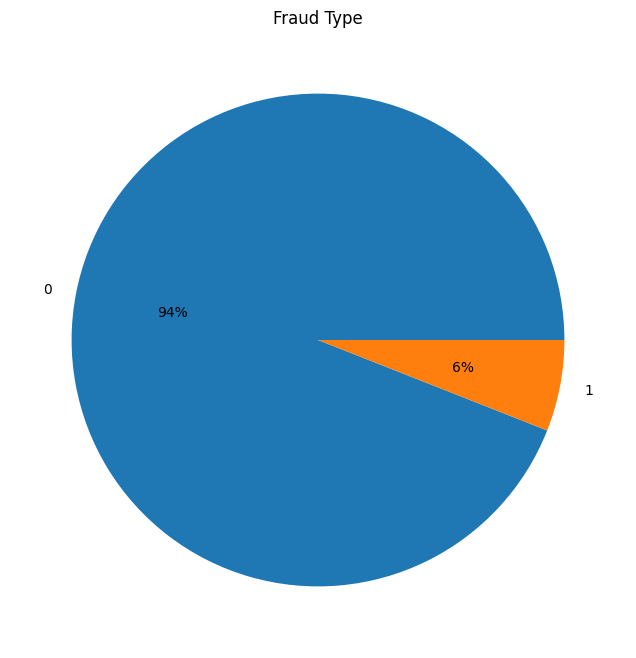

In [63]:
plt.figure(figsize=(10,8))
plt.pie(data.FraudFound_P.value_counts().values,labels=data.FraudFound_P.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()
#Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is extremely imbalanced

<Axes: title={'center': 'Unique values per feature'}>

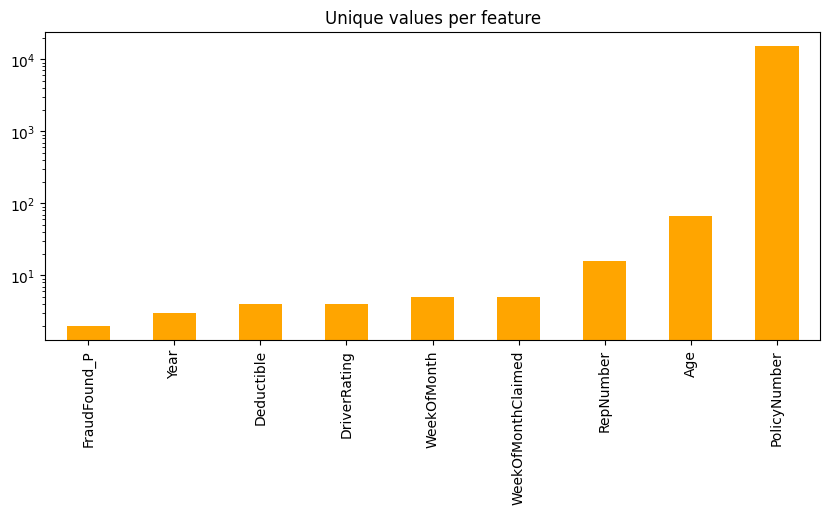

In [64]:
# Find out the number of unique values of the categorical features 
unique_values_cat = data.select_dtypes(
  include= "object").nunique().sort_values()

# Find out the number of unique values of the numerical features 
unique_values_con = data.select_dtypes(
  include= "number").nunique().sort_values()

# Plot a countplot of the unique values per numerical feature
unique_values_con.plot.bar(logy=True, figsize=(10, 4),
                       title="Unique values per feature", color= 'orange')

<Axes: title={'center': 'Unique values per feature'}>

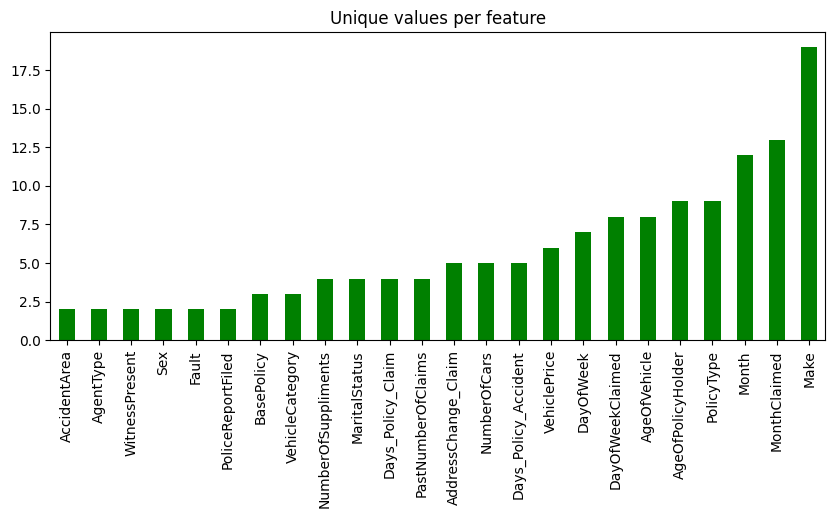

In [65]:
# Plot a countplot of the unique values per categorical feature
unique_values_cat.plot.bar( figsize=(10, 4),
                       title="Unique values per feature", color= 'green')

#we can use this plot for encoding

In [66]:
data['Age'].unique()
# Dive in deeper into age to look at the unique categories , realised that there is age 0 - which is illogical 

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [67]:
avr = round(data['Age'].mean(), 0)
data.loc[data['Age']==0, 'Age'] = avr
# Replace all 0 values with the average age

In [68]:
data.loc[data['DayOfWeekClaimed']== '0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [69]:
data.loc[data['MonthClaimed']== '0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [70]:
data.loc[1516, 'FraudFound_P']
#Row 1516 has 0 values for both 'MonthClaimed' and 'DayOfWeekClaimed', Before we drop the row, let us check if this row is a fraud case or not. 

0

In [71]:
# Drop the column 1516 
data.drop(1516, axis = 0, inplace = True)

# Reset index of the dataset after dropping row
data.reset_index(drop= True, inplace = True)

In [72]:
data.drop('PolicyNumber', axis = 1, inplace = True)
#unique identifier , which is not nessasery for analyis --> drop the column

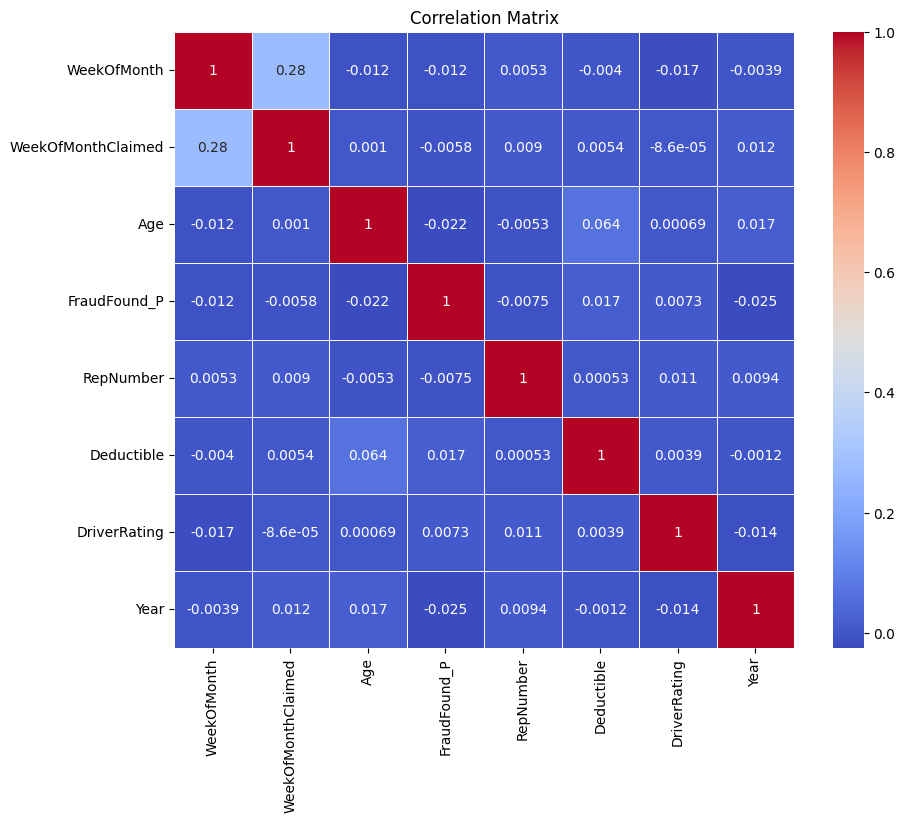

In [73]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
#heatmap for numerical features to understand rhe relations between them

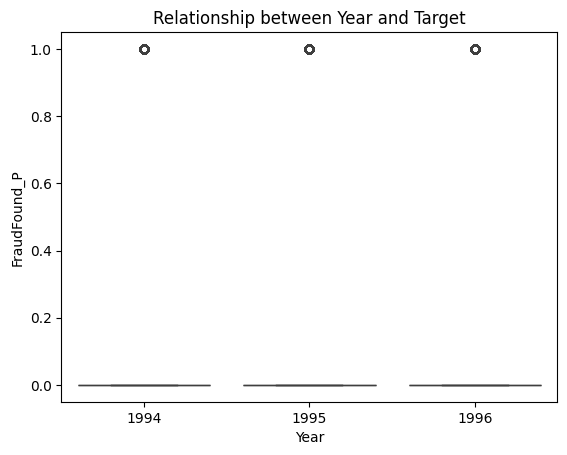

In [74]:
sns.boxplot(x=data['Year'], y=data['FraudFound_P'])  
plt.title("Relationship between Year and Target")
plt.show()

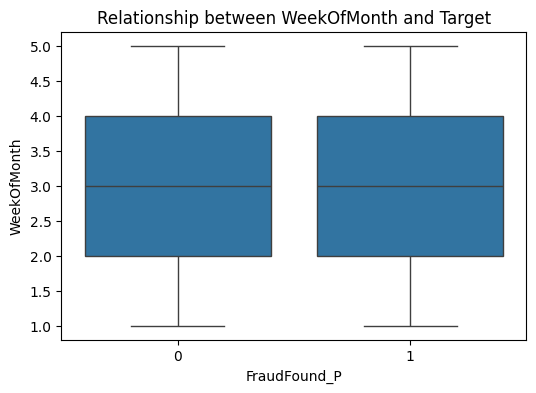

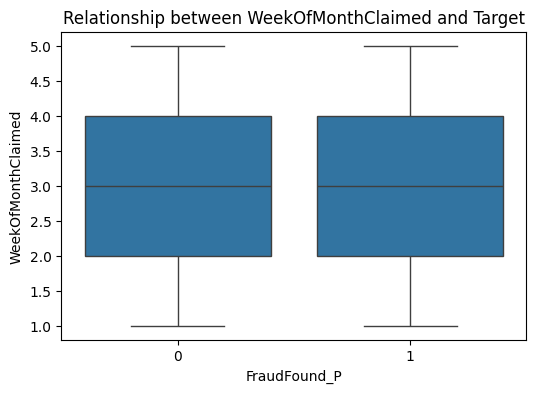

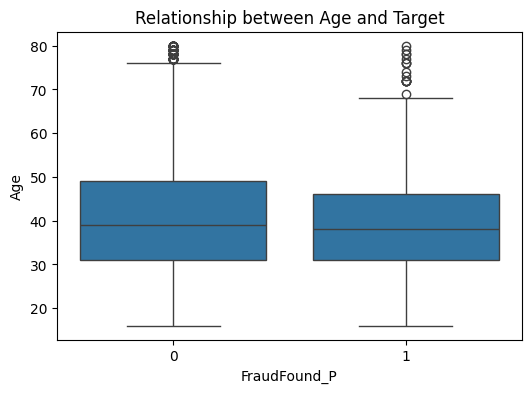

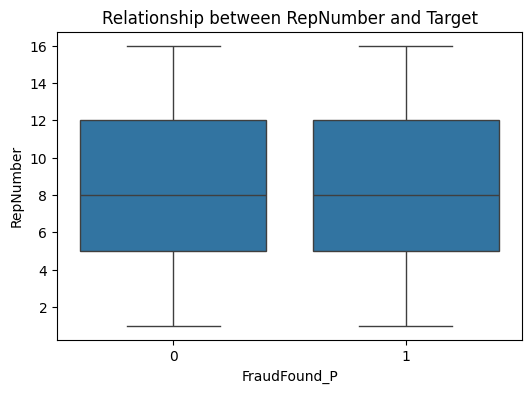

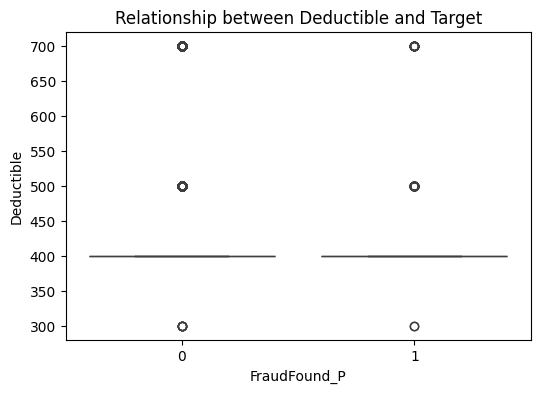

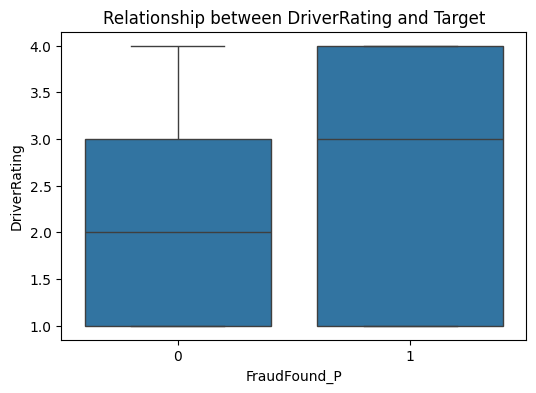

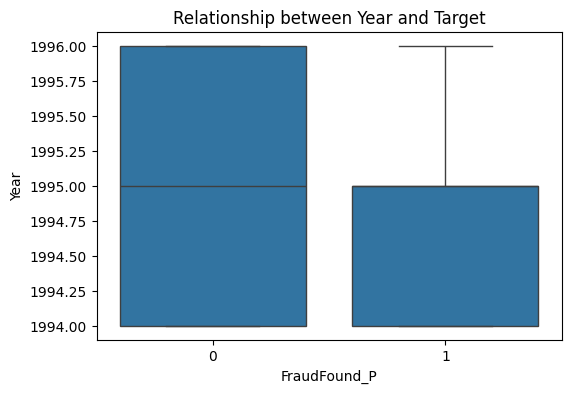

In [75]:
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
                        'RepNumber', 'Deductible', 'DriverRating', 'Year']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['FraudFound_P'], y=data[col])
    plt.title(f"Relationship between {col} and Target")
    plt.show()

In [76]:
"""numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
                        'RepNumber', 'Deductible', 'DriverRating']
#scaler = MinMaxScaler()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.head()"""

"numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', \n                        'RepNumber', 'Deductible', 'DriverRating']\n#scaler = MinMaxScaler()\nscaler = StandardScaler()\ndata[numerical_cols] = scaler.fit_transform(data[numerical_cols])\ndata.head()"

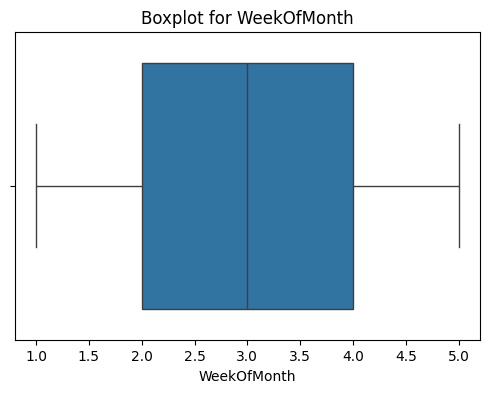

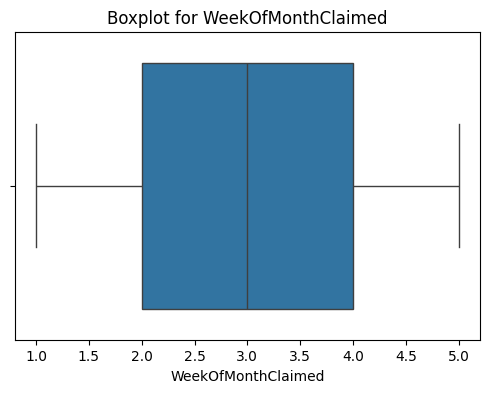

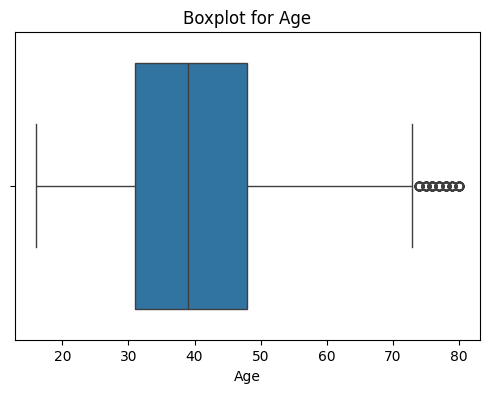

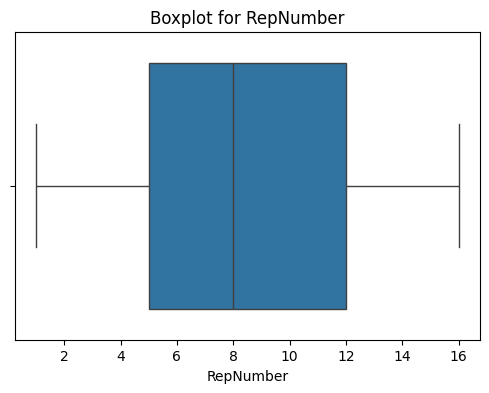

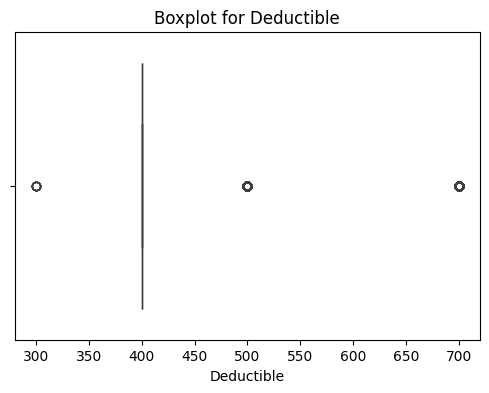

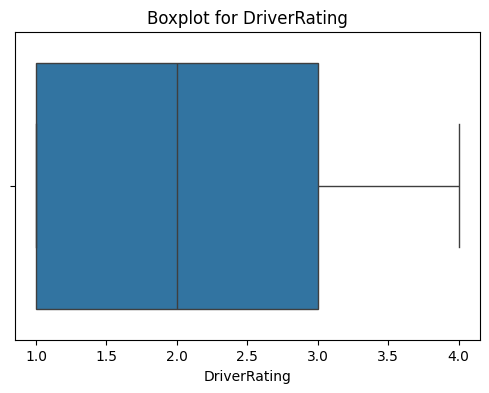

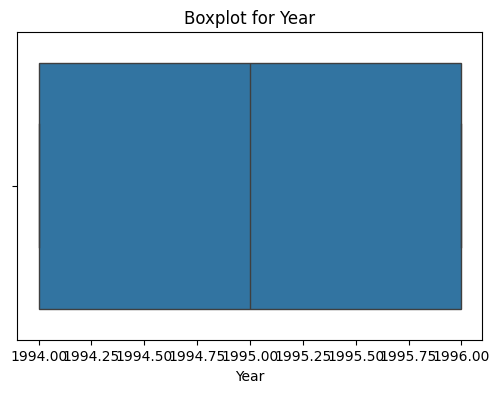

In [77]:
#box plot to find outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [78]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [79]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


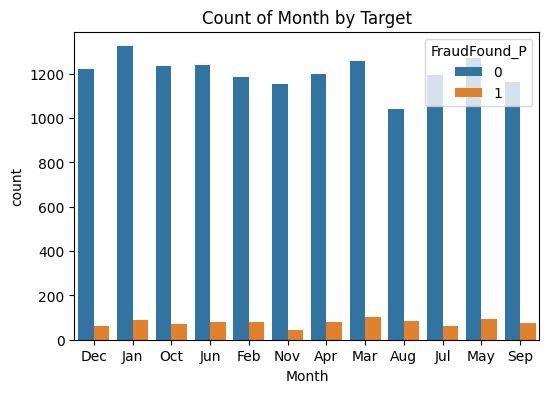

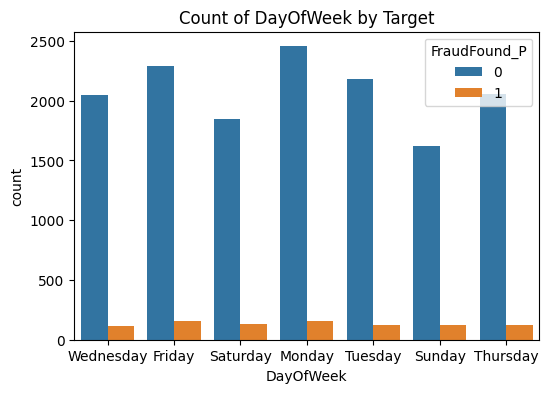

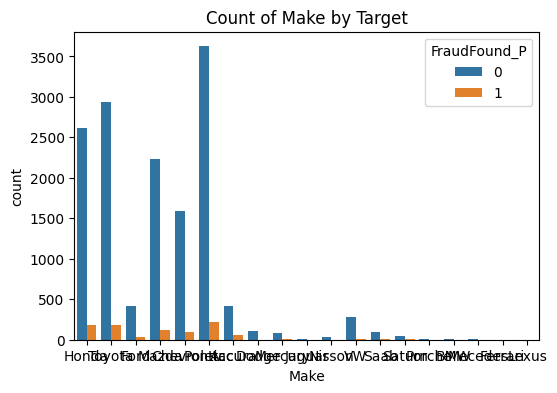

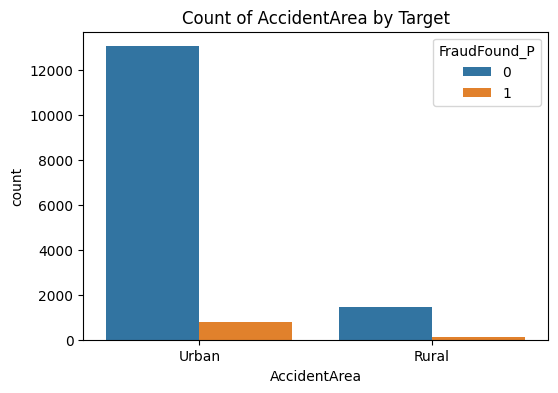

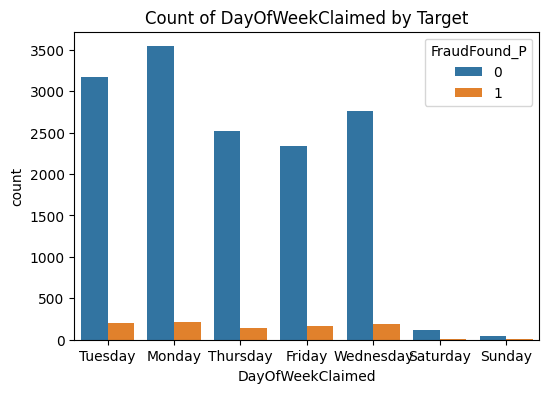

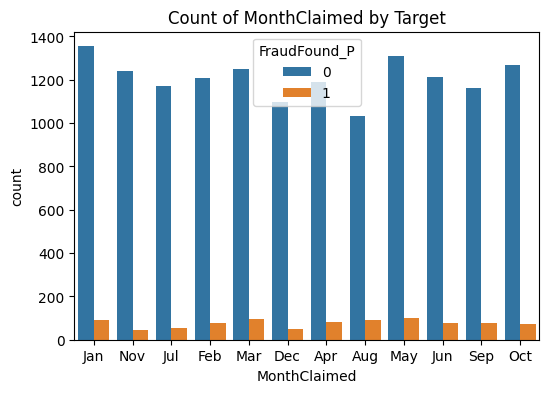

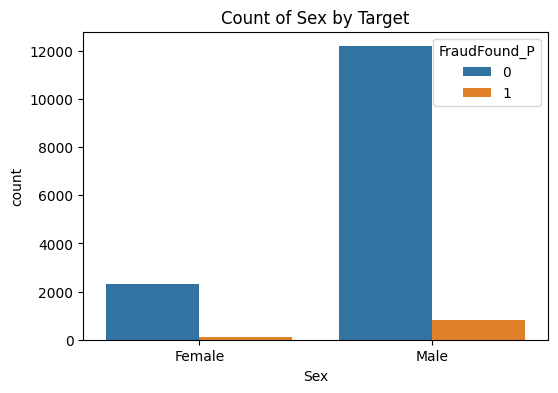

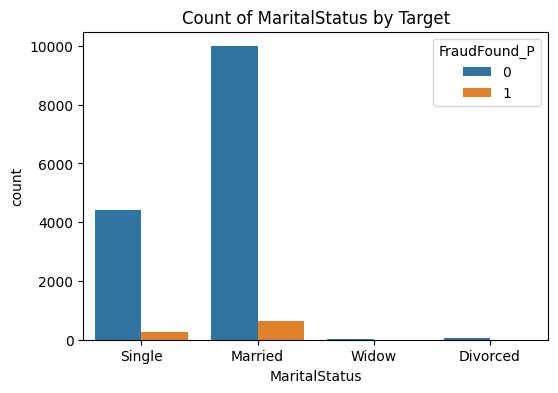

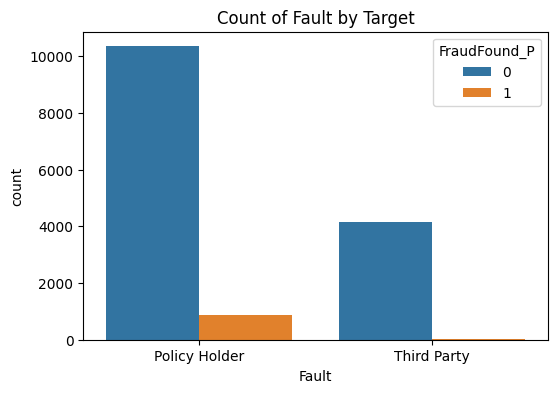

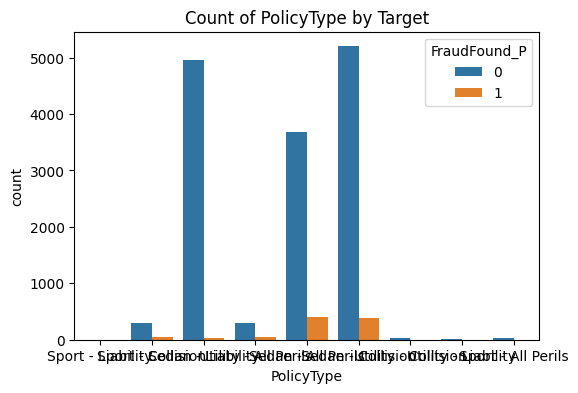

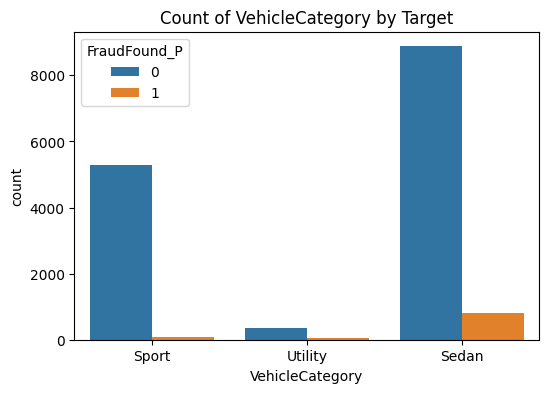

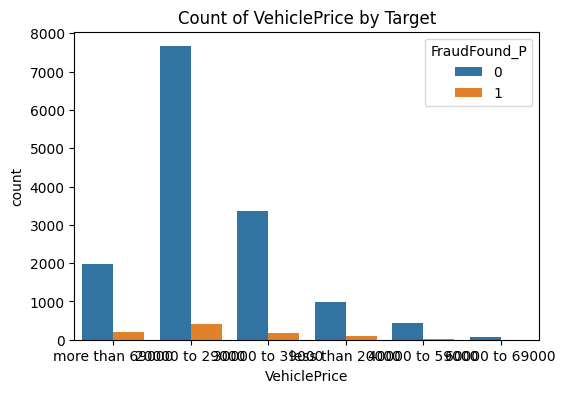

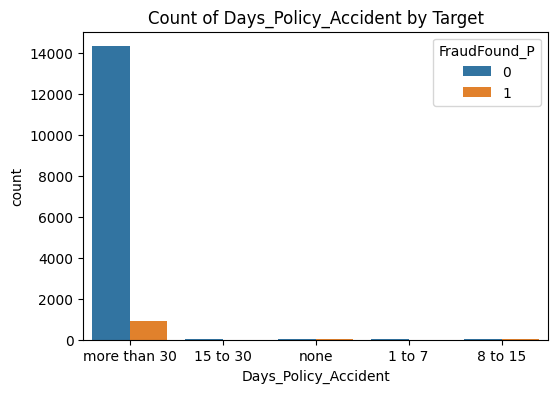

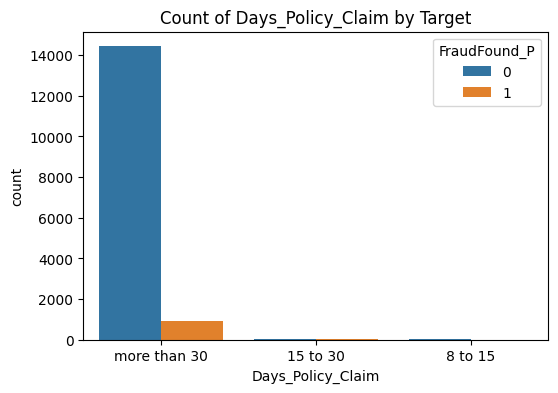

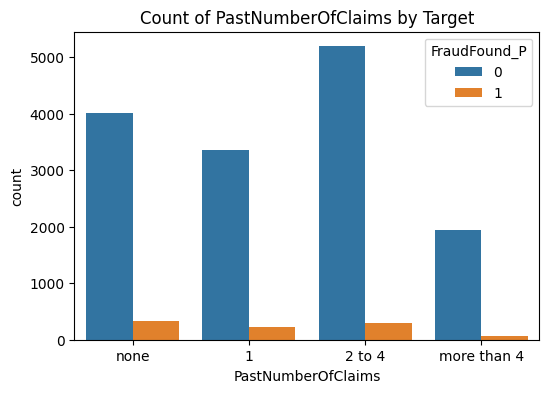

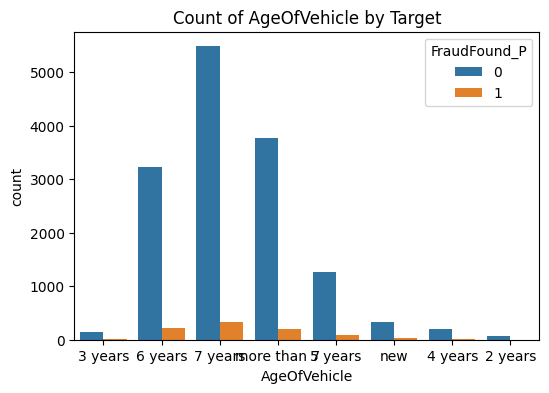

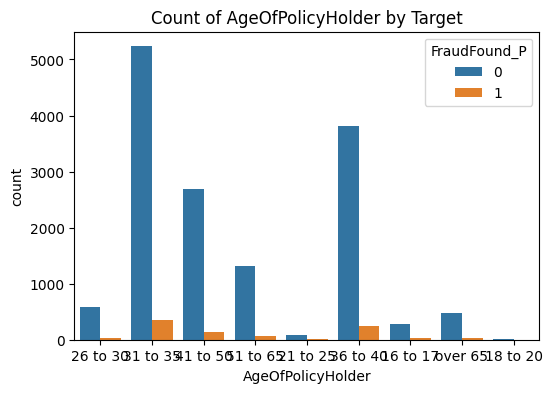

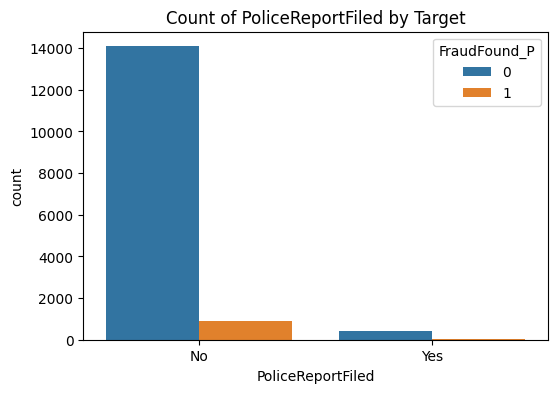

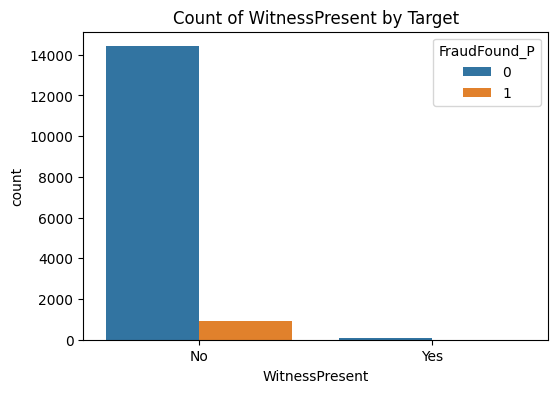

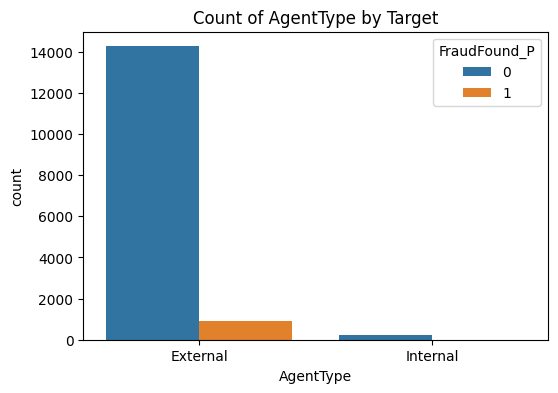

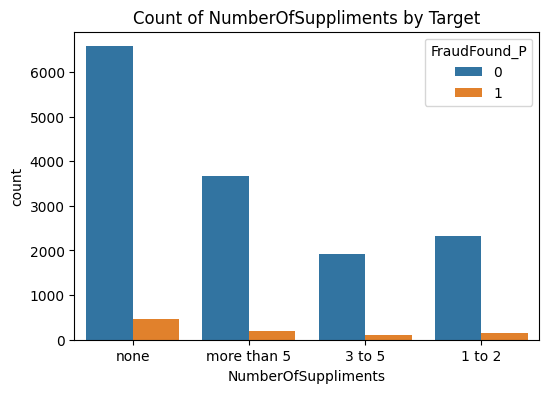

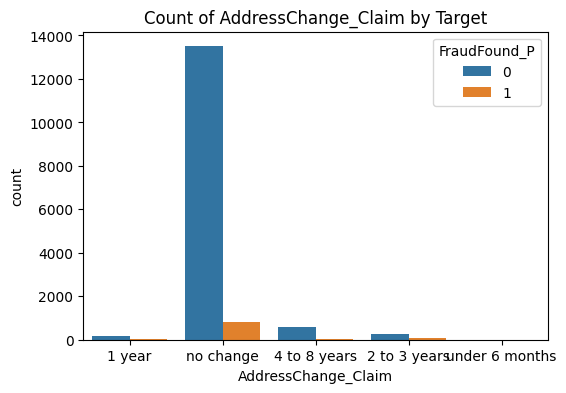

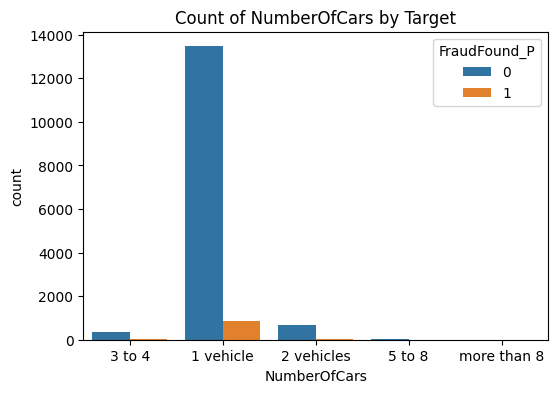

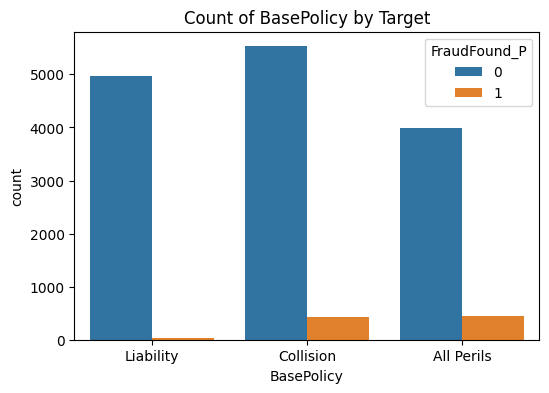

In [80]:
#show relationship between target and categorical column
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='FraudFound_P', data=data)
    plt.title(f"Count of {col} by Target")
    plt.show()

In [81]:
print(data['PastNumberOfClaims'].dtype)
print(data['PastNumberOfClaims'].unique())

object
['none' '1' '2 to 4' 'more than 4']


In [82]:
# Define a mapping for the values in 'PastNumberOfClaims'
mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,          # Average of the range
    'more than 4': 5      # Assign a value greater than 4
}

# Apply the mapping to the column
data['PastNumberOfClaims'] = data['PastNumberOfClaims'].map(mapping)

# Verify the transformation
print(data['PastNumberOfClaims'].unique())


[0 1 3 5]


In [83]:
data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year BasePolicy  
0                 none               1 year        3 to 4  1994  Liability  
1                 none            no change     1 vehicle  1994  Collision  
2                 none            no change     1 vehicle  1994  Collision  
3          more than 5            no change     1 vehicle  1994  Liability  
4                 none            no change     1 vehicle  1994  Collision  

[5 rows x 32 columns]

In [84]:
print(data['AgeOfVehicle'].dtype)

# Check unique values in the column to understand its nature
print(data['AgeOfVehicle'].unique())


object
['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']


In [85]:
# Define a mapping for the values in the car age column
car_age_mapping = {
    'new': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}

# Apply the mapping to the car age column
data['AgeOfVehicle'] = data['AgeOfVehicle'].map(car_age_mapping)

# Verify the transformation
print(data['AgeOfVehicle'].unique())


[3 6 7 8 5 1 4 2]


In [86]:
print(data['NumberOfCars'].dtype)

# Check unique values in the column to understand its nature
print(data['NumberOfCars'].unique())

object
['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']


In [87]:
# Define a discrete mapping for the 'NumberOfCars' column
number_of_cars_discrete_mapping = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 4,
    '5 to 8': 8,
    'more than 8': 9
}

# Apply the mapping to the column
data['NumberOfCars'] = data['NumberOfCars'].map(number_of_cars_discrete_mapping)


In [88]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
    'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}


#data['MonthClaimed'].replace('0', np.nan)
data['MonthClaimed'] = data['MonthClaimed'].map(month_mapping)
data['MonthClaimed_sin'] = np.sin(2 * np.pi * data['MonthClaimed'] / 12)
data['MonthClaimed_cos'] = np.cos(2 * np.pi * data['MonthClaimed'] / 12)
data.drop(columns=['MonthClaimed'], inplace=True)
data['Month'] = data['Month'].map(month_mapping)
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)
data.drop(columns=['Month'], inplace=True)

#use cyclic encoding for day and month 
day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)
data.drop(columns=['DayOfWeek'], inplace=True)
data['DayOfWeekClaimed'] = data['DayOfWeekClaimed'].map(day_mapping)
data['DayOfWeekClaimed_sin'] = np.sin(2 * np.pi * data['DayOfWeekClaimed'] / 7)
data['DayOfWeekClaimed_cos'] = np.cos(2 * np.pi * data['DayOfWeekClaimed'] / 7)
data.drop(columns=['DayOfWeekClaimed'], inplace=True)


#data = pd.get_dummies(data, columns=['MaritalStatus'], drop_first=False)
data = pd.get_dummies(data, columns=['PolicyType'], drop_first=False)
data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['AccidentArea'], drop_first=False)
data = pd.get_dummies(data, columns=['Fault'], drop_first=False)
data['WitnessPresent'] = data['WitnessPresent'].map({'Yes': 1, 'No': 0})
data['AgentType'] = data['AgentType'].map({'External': 0, 'Internal': 1})
data = pd.get_dummies(data, columns=['BasePolicy'], drop_first=False)
data['PoliceReportFiled'] = data['PoliceReportFiled'].map({'Yes': 1, 'No': 0})

In [89]:
policy_mapping = {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}
data['Days_Policy_Claim'] = data['Days_Policy_Claim'].map(policy_mapping)

price_mapping = {
    'less than 20000': 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000': 4,
    'more than 69000': 5
}
data['VehiclePrice'] = data['VehiclePrice'].map(price_mapping)

Days_Policy_Accident_mapping = {
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '15 to 30': 3,
    'more than 30': 4
}
data['Days_Policy_Accident'] = data['Days_Policy_Accident'].map(Days_Policy_Accident_mapping)

number_of_suppliments_mapping = {
    'none': 0, 
    '1 to 2': 1, 
    '3 to 5': 2, 
    'more than 5': 3
}

data['NumberOfSuppliments'] = data['NumberOfSuppliments'].map(number_of_suppliments_mapping)

age_of_policy_holder_mapping = {
    '16 to 17': 0, 
    '18 to 20': 1, 
    '21 to 25': 2, 
    '26 to 30': 3, 
    '31 to 35': 4, 
    '36 to 40': 5, 
    '41 to 50': 6, 
    '51 to 65': 7, 
    'over 65': 8
}

data['AgeOfPolicyHolder'] = data['AgeOfPolicyHolder'].map(age_of_policy_holder_mapping)



In [90]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['VehicleCategory'])
data = encoder.fit_transform(data)

encoder = ce.BinaryEncoder(cols=['Make'])
data = encoder.fit_transform(data)

encoder = ce.BinaryEncoder(cols=['MaritalStatus'])
data = encoder.fit_transform(data)



In [91]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['AddressChange_Claim'] = encoder.fit_transform(data['AddressChange_Claim'])
data.head()

WeekOfMonth  Make_0  Make_1  Make_2  Make_3  Make_4  WeekOfMonthClaimed  \
0            5       0       0       0       0       1                   1   
1            3       0       0       0       0       1                   4   
2            5       0       0       0       0       1                   2   
3            2       0       0       0       1       0                   1   
4            5       0       0       0       0       1                   2   

   Sex  MaritalStatus_0  MaritalStatus_1  ...  \
0    1                0                0  ...   
1    0                0                0  ...   
2    0                0                1  ...   
3    0                0                1  ...   
4    1                0                0  ...   

   PolicyType_Utility - All Perils  PolicyType_Utility - Collision  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   PolicyType_Utility - Liability  AccidentArea_Rural  AccidentArea_Urban  \
0                           False               False                True   
1                           False               False                True   
2                           False               False                True   
3                           False                True               False   
4                           False               False                True   

   Fault_Policy Holder  Fault_Third Party  BasePolicy_All Perils  \
0                 True              False                  False   
1                 True              False                  False   
2                 True              False                  False   
3                False               True                  False   
4                False               True                  False   

   BasePolicy_Collision  BasePolicy_Liability  
0                 False                  True  
1                  True                 False  
2                  True                 False  
3                 False                  True  
4                  True                 False  

[5 rows x 55 columns]

In [92]:
print(data.isna().sum())

WeekOfMonth                        0
Make_0                             0
Make_1                             0
Make_2                             0
Make_3                             0
Make_4                             0
WeekOfMonthClaimed                 0
Sex                                0
MaritalStatus_0                    0
MaritalStatus_1                    0
MaritalStatus_2                    0
Age                                0
VehicleCategory_0                  0
VehicleCategory_1                  0
VehiclePrice                       0
FraudFound_P                       0
RepNumber                          0
Deductible                         0
DriverRating                       0
Days_Policy_Accident               0
Days_Policy_Claim                  0
PastNumberOfClaims                 0
AgeOfVehicle                       0
AgeOfPolicyHolder                  0
PoliceReportFiled                  0
WitnessPresent                     0
AgentType                          0
N

In [93]:
print(data['MonthClaimed_sin'].dtype)

# Check unique values in the column to understand its nature
print(data['MonthClaimed_sin'].unique())

float64
[ 5.00000000e-01 -5.00000000e-01 -5.00000000e-01  8.66025404e-01
  1.00000000e+00 -2.44929360e-16  8.66025404e-01 -8.66025404e-01
  1.22464680e-16 -1.00000000e+00 -8.66025404e-01]


In [94]:
print(data.isna().sum())

WeekOfMonth                        0
Make_0                             0
Make_1                             0
Make_2                             0
Make_3                             0
Make_4                             0
WeekOfMonthClaimed                 0
Sex                                0
MaritalStatus_0                    0
MaritalStatus_1                    0
MaritalStatus_2                    0
Age                                0
VehicleCategory_0                  0
VehicleCategory_1                  0
VehiclePrice                       0
FraudFound_P                       0
RepNumber                          0
Deductible                         0
DriverRating                       0
Days_Policy_Accident               0
Days_Policy_Claim                  0
PastNumberOfClaims                 0
AgeOfVehicle                       0
AgeOfPolicyHolder                  0
PoliceReportFiled                  0
WitnessPresent                     0
AgentType                          0
N

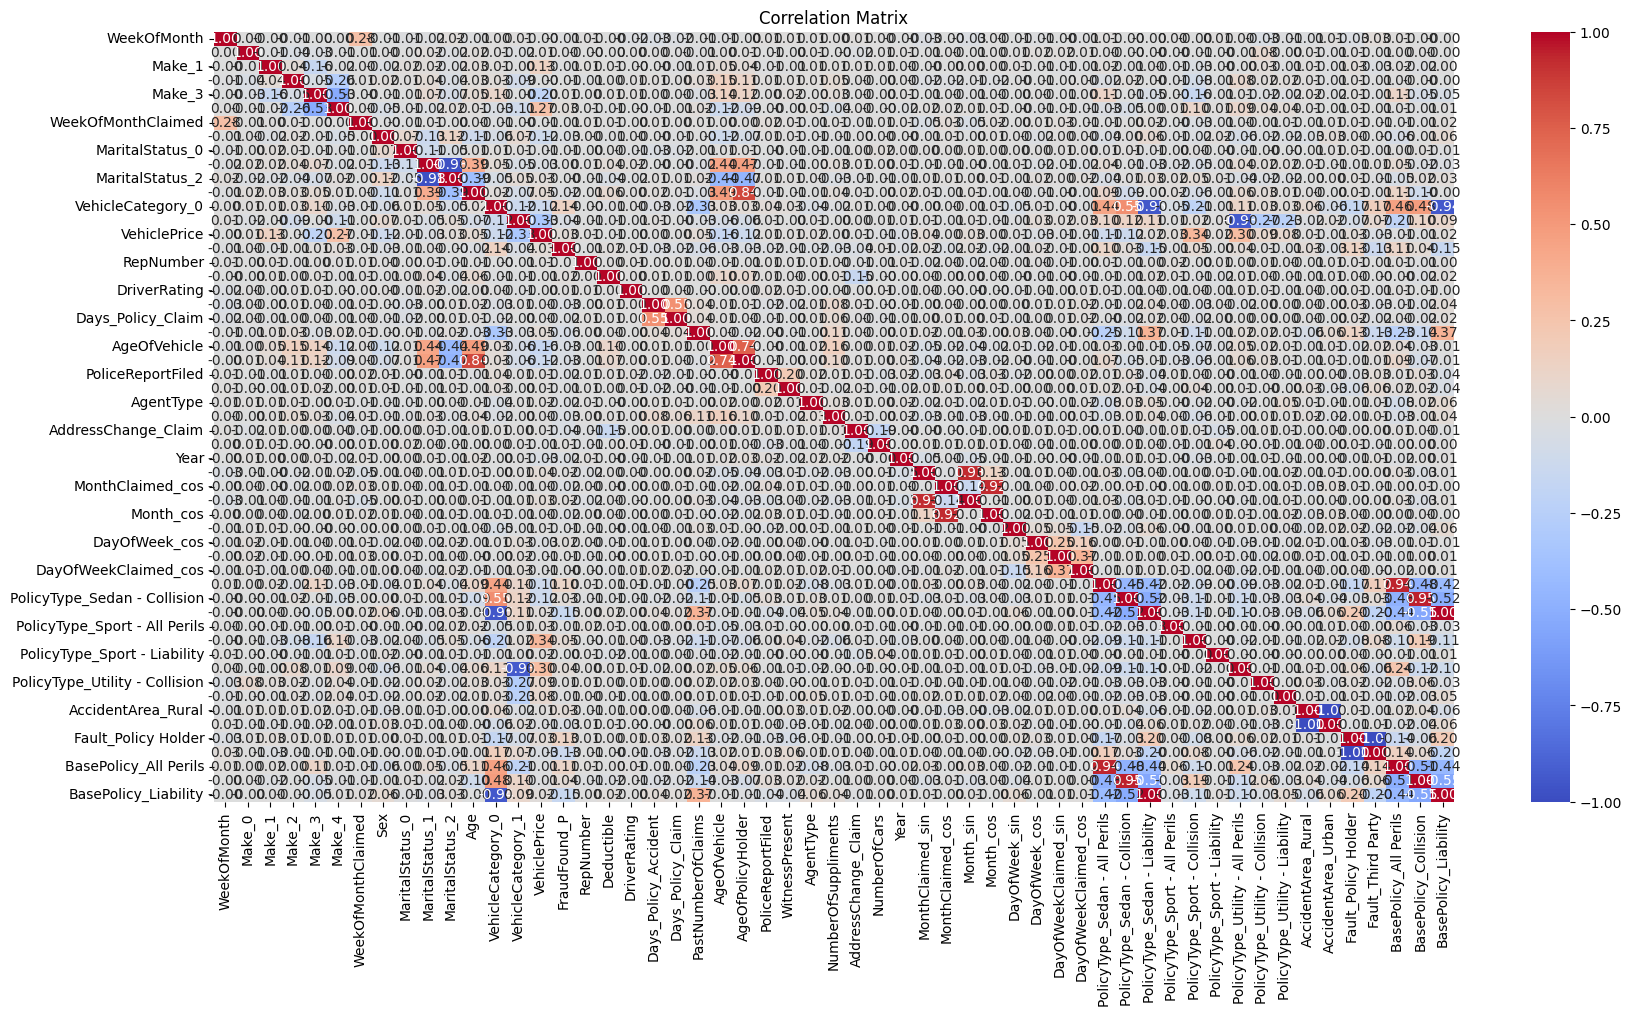

In [95]:
corr_matrix = data.corr()

# Increase the figure size
plt.figure(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [96]:
data.describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WeekOfMonth                      15419 non-null  int64  
 1   Make_0                           15419 non-null  int64  
 2   Make_1                           15419 non-null  int64  
 3   Make_2                           15419 non-null  int64  
 4   Make_3                           15419 non-null  int64  
 5   Make_4                           15419 non-null  int64  
 6   WeekOfMonthClaimed               15419 non-null  int64  
 7   Sex                              15419 non-null  int64  
 8   MaritalStatus_0                  15419 non-null  int64  
 9   MaritalStatus_1                  15419 non-null  int64  
 10  MaritalStatus_2                  15419 non-null  int64  
 11  Age                              15419 non-null  int64  
 12  VehicleCategory_0 

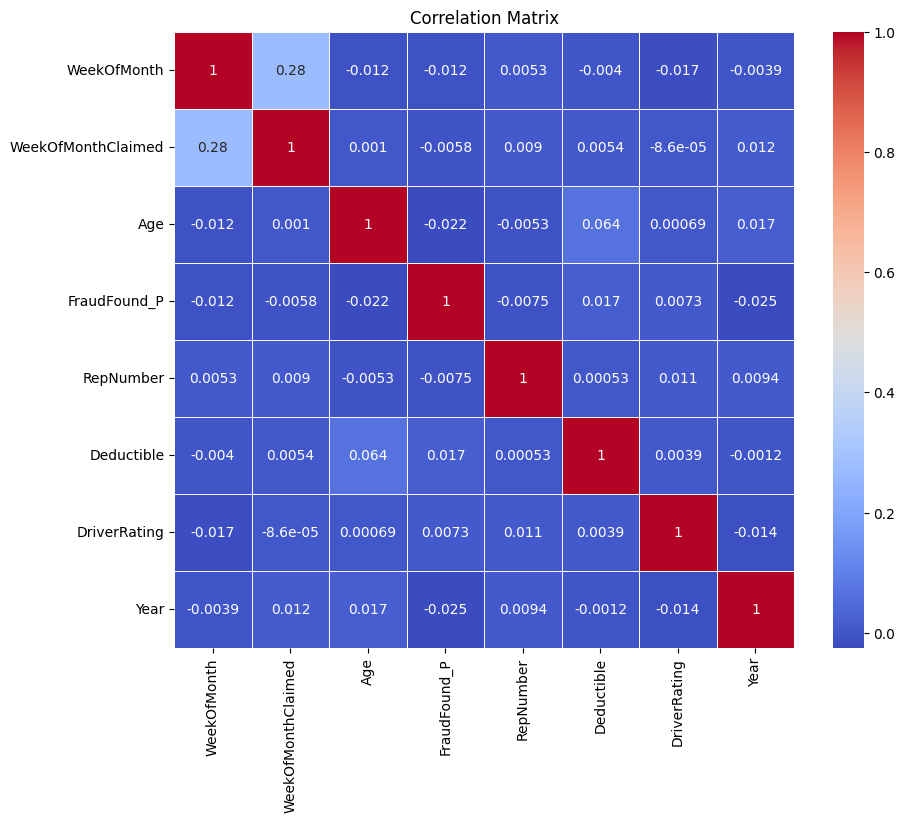

In [97]:
# Presenting the correlation as a hetmap for better visualisation
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



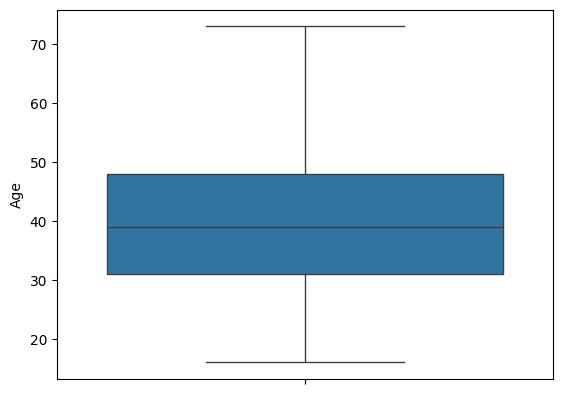

In [98]:
#clean outliers
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Age"] >= lower_bound) & (data["Age"] <= upper_bound)]
sns.boxplot(data["Age"])
plt.show()

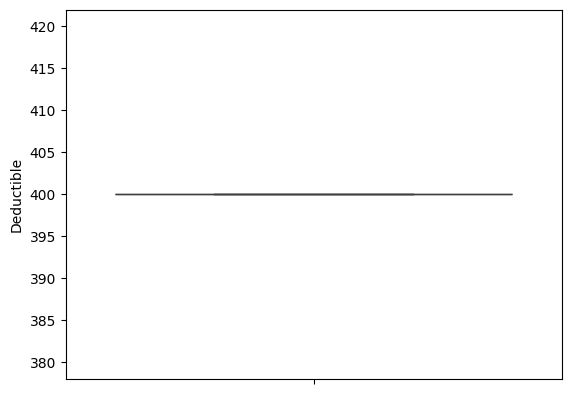

In [99]:
Q1 = data['Deductible'].quantile(0.25)
Q3 = data['Deductible'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Deductible"] >= lower_bound) & (data["Deductible"] <= upper_bound)]
sns.boxplot(data["Deductible"])
plt.show()

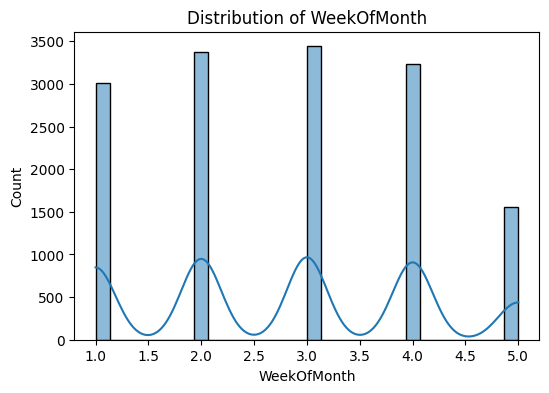

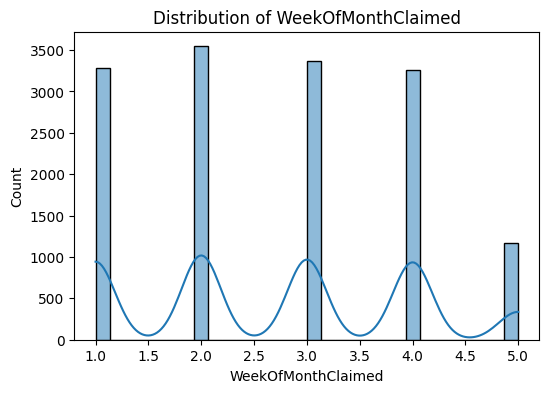

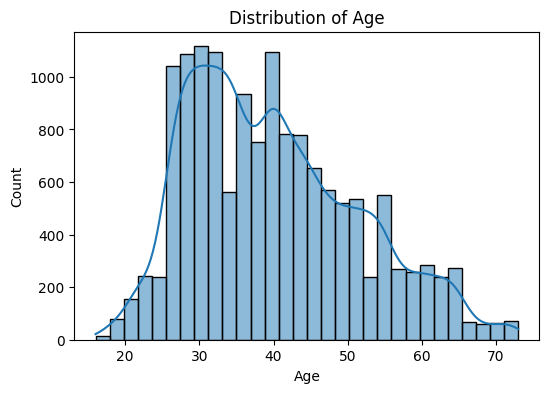

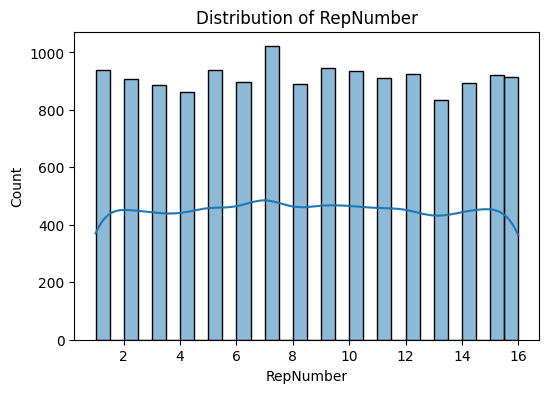

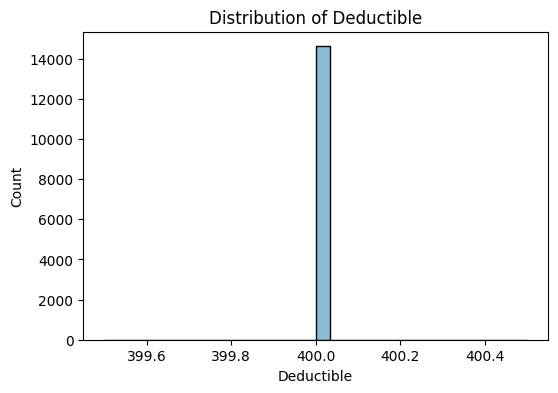

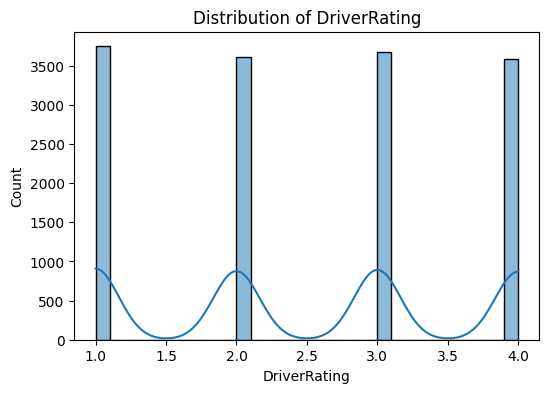

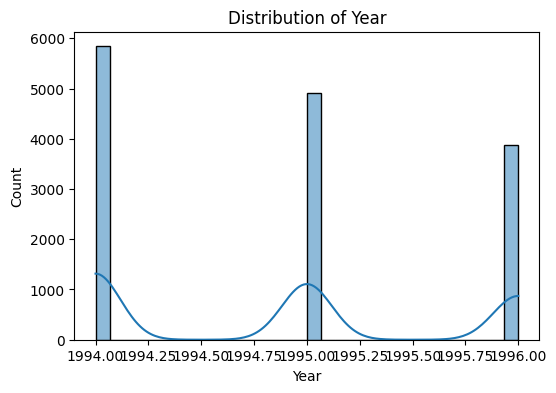

In [100]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

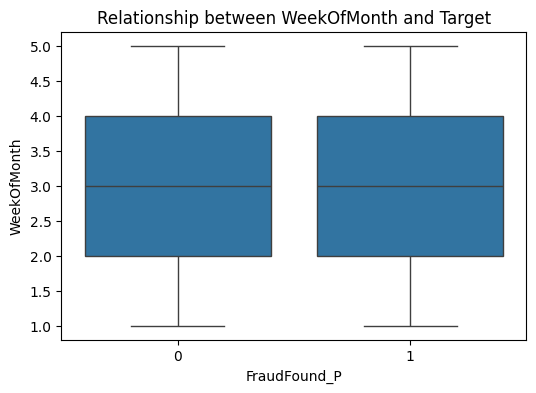

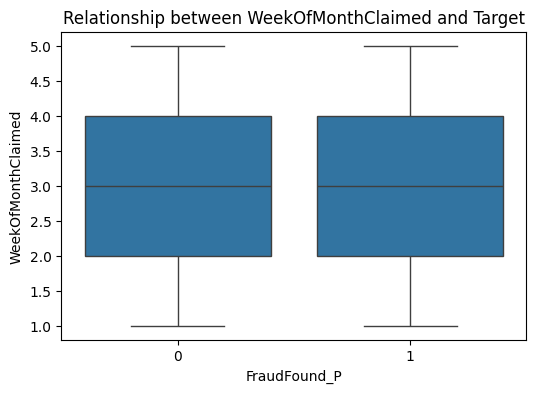

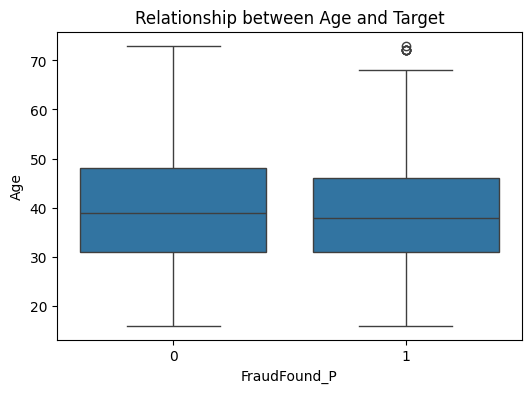

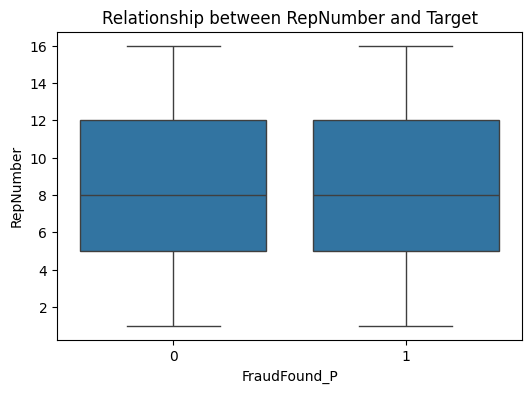

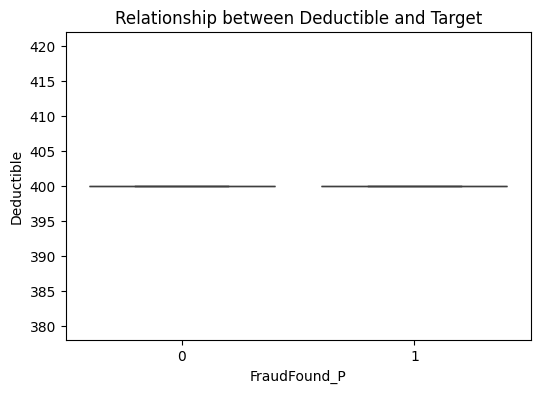

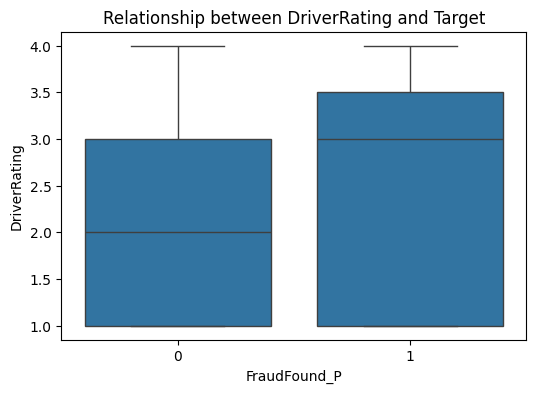

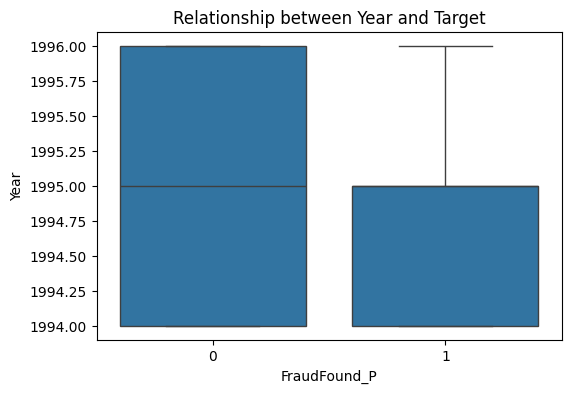

In [101]:

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['FraudFound_P'], y=data[col])
    plt.title(f"Relationship between {col} and Target")
    plt.show()


In [102]:
#part3 Classification
from sklearn.model_selection import train_test_split

features = data.drop(columns=['FraudFound_P'])  
target = data['FraudFound_P']               

X_train, X_test, y_train, y_test = train_test_split(features, target , test_size=0.3, random_state=42, stratify=target)



In [103]:
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
                        'RepNumber', 'Deductible', 'DriverRating','Year']
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
data.head(10)

WeekOfMonth  Make_0  Make_1  Make_2  Make_3  Make_4  WeekOfMonthClaimed  \
1             3       0       0       0       0       1                   4   
2             5       0       0       0       0       1                   2   
3             2       0       0       0       1       0                   1   
4             5       0       0       0       0       1                   2   
5             4       0       0       0       0       1                   1   
6             1       0       0       0       0       1                   3   
7             1       0       0       0       0       1                   4   
8             4       0       0       0       0       1                   5   
9             3       0       0       0       1       1                   3   
10            2       0       0       1       0       0                   3   

    Sex  MaritalStatus_0  MaritalStatus_1  ...  \
1     0                0                0  ...   
2     0                0                1  ...   
3     0                0                1  ...   
4     1                0                0  ...   
5     0                0                0  ...   
6     0                0                1  ...   
7     0                0                0  ...   
8     0                0                0  ...   
9     0                0                1  ...   
10    0                0                0  ...   

    PolicyType_Utility - All Perils  PolicyType_Utility - Collision  \
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
5                             False                           False   
6                             False                           False   
7                             False                           False   
8                             False                           False   
9                              True                           False   
10                            False                           False   

    PolicyType_Utility - Liability  AccidentArea_Rural  AccidentArea_Urban  \
1                            False               False                True   
2                            False               False                True   
3                            False                True               False   
4                            False               False                True   
5                            False               False                True   
6                            False               False                True   
7                            False               False                True   
8                            False               False                True   
9                            False               False                True   
10                           False               False                True   

    Fault_Policy Holder  Fault_Third Party  BasePolicy_All Perils  \
1                  True              False                  False   
2                  True              False                  False   
3                 False               True                  False   
4                 False               True                  False   
5                 False               True                  False   
6                 False               True                  False   
7                  True              False                  False   
8                  True              False                  False   
9                  True              False                   True   
10                 True              False                   True   

    BasePolicy_Collision  BasePolicy_Liability  
1                   True                 False  
2                   True                 False  
3                  False           

In [104]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 31/31 [00:25<00:00,  1.22it/s]

[LightGBM] [Info] Number of positive: 593, number of negative: 9642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 10235, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057938 -> initscore=-2.788689
[LightGBM] [Info] Start training from score -2.788689
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.59               0.65     0.65      0.69   
DecisionTreeClassifier             0.88               0.55     0.55      0.89   
GaussianNB                         0.91               0.54     0.54      0.90   
Perceptron                         0.88  

In [105]:
from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [106]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)
models.head(10)
print(models)

100%|██████████| 31/31 [01:43<00:00,  1.47s/it]

[LightGBM] [Info] Number of positive: 9642, number of negative: 9642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 19284, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 31/31 [01:43<00:00,  3.33s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.70               0.62     0.62      0.78   
NearestCentroid                    0.67               0.62     0.62      0.76   
NuSVC                              0.84               0.59     0.59      0.87   
SGDClassifier                      0.71               0.57     0.57      0.79   
KNeighborsClassifier               0.74               0.57     0.57      0.81   
CalibratedClassifierCV             0.75               0.56     0.56      0.81   
LogisticRegression                 0.74               0.56     0.56      0.81   
RidgeClassifierCV                  0.74               0.56     0.56      0.80   
RidgeClassifier                    0.74               0.56     0.56      0.80   
LinearDiscriminantAnalysis         0.74               0.56     0.56      0.80   
LinearSVC                   

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42, class_weight='balanced')


model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
[[4120   13]
 [ 245    9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4133
           1       0.41      0.04      0.07       254

    accuracy                           0.94      4387
   macro avg       0.68      0.52      0.52      4387
weighted avg       0.91      0.94      0.92      4387


ROC AUC Score:
0.8242477962091177


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_prob = model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))


print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.94   | 0.23   | 0.64
0.15      | 0.15      | 0.77   | 0.25   | 0.73
0.20      | 0.17      | 0.60   | 0.26   | 0.80
0.25      | 0.17      | 0.39   | 0.24   | 0.86
0.30      | 0.19      | 0.24   | 0.21   | 0.90
0.35      | 0.21      | 0.15   | 0.18   | 0.92
0.40      | 0.29      | 0.11   | 0.16   | 0.93
0.45      | 0.36      | 0.06   | 0.10   | 0.94
0.50      | 0.41      | 0.04   | 0.07   | 0.94
0.55      | 0.64      | 0.03   | 0.05   | 0.94
0.60      | 0.40      | 0.01   | 0.02   | 0.94
0.65      | 0.50      | 0.01   | 0.02   | 0.94
0.70      | 1.00      | 0.00   | 0.01   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


In [109]:
optimal_threshold = 0.18
y_pred_rf = (y_prob >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_rf))



Confusion Matrix with Optimal Threshold:
[[3143  990]
 [  72  182]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      4133
           1       0.16      0.72      0.26       254

    accuracy                           0.76      4387
   macro avg       0.57      0.74      0.56      4387
weighted avg       0.93      0.76      0.82      4387



In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Optimal Threshold Metrics:
Precision: 0.16
Recall: 0.72
F1-Score: 0.26
Accuracy: 0.76


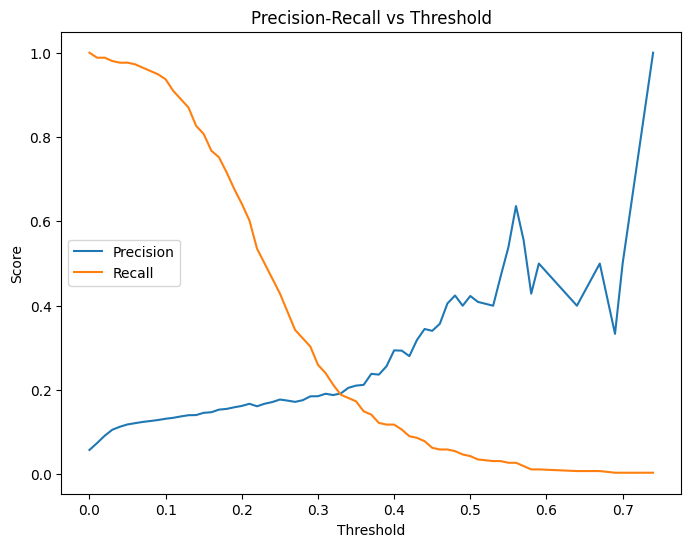

In [111]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()


Optimal Threshold: 0.21
Highest F1-Score: 0.261986301369863


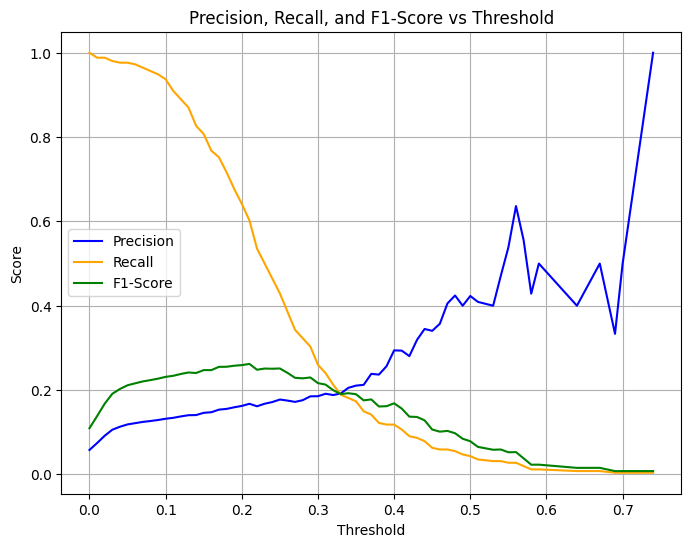

In [112]:
from sklearn.metrics import precision_recall_curve, f1_score


y_probs = model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = f1_scores[:-1]  


optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Highest F1-Score: {f1_scores[optimal_idx]}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='orange')
plt.plot(thresholds, f1_scores, label="F1-Score", color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [113]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': [None] + list(np.arange(2, 21, 2)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['sqrt', 'log2', None]
}


rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1',  
    cv=5,  
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", random_search.best_params_)
print("Best f1 score Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best f1 score Score: 0.9701113808802131


In [114]:

best_rf_params = random_search.best_params_
optimized_rf = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params)


optimized_rf.fit(X_train_resampled, y_train_resampled)


y_pred_rf = optimized_rf.predict(X_test)
y_prob_rf = optimized_rf.predict_proba(X_test)[:, 1]


from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
[[4109   24]
 [ 243   11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4133
           1       0.31      0.04      0.08       254

    accuracy                           0.94      4387
   macro avg       0.63      0.52      0.52      4387
weighted avg       0.91      0.94      0.92      4387


ROC AUC Score:
0.8254942454719171


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob_rf >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.95   | 0.23   | 0.63
0.15      | 0.14      | 0.86   | 0.24   | 0.69
0.20      | 0.16      | 0.71   | 0.26   | 0.76
0.25      | 0.17      | 0.52   | 0.26   | 0.82
0.30      | 0.18      | 0.34   | 0.24   | 0.87
0.35      | 0.18      | 0.20   | 0.19   | 0.90
0.40      | 0.20      | 0.11   | 0.15   | 0.92
0.45      | 0.25      | 0.07   | 0.11   | 0.93
0.50      | 0.31      | 0.04   | 0.08   | 0.94
0.55      | 0.36      | 0.03   | 0.06   | 0.94
0.60      | 0.42      | 0.02   | 0.04   | 0.94
0.65      | 0.50      | 0.02   | 0.03   | 0.94
0.70      | 0.67      | 0.01   | 0.02   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


In [120]:
optimal_threshold = 0.25
y_pred_rf = (y_prob_rf >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_rf))



Confusion Matrix with Optimal Threshold:
[[3478  655]
 [ 121  133]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4133
           1       0.17      0.52      0.26       254

    accuracy                           0.82      4387
   macro avg       0.57      0.68      0.58      4387
weighted avg       0.92      0.82      0.86      4387



In [121]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Optimal Threshold Metrics:
Precision: 0.17
Recall: 0.52
F1-Score: 0.26
Accuracy: 0.82


In [118]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:")
print(roc_auc)


Confusion Matrix:
[[3899  234]
 [ 179   75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4133
           1       0.24      0.30      0.27       254

    accuracy                           0.91      4387
   macro avg       0.60      0.62      0.61      4387
weighted avg       0.91      0.91      0.91      4387


ROC AUC Score:
0.8437837570085979


In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10]  
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_


In [123]:
from sklearn.metrics import precision_recall_curve

y_pred_xgb = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_xgb)

optimal_threshold = thresholds[(precisions + recalls).argmax()]
y_pred_custom = (y_pred_xgb >= optimal_threshold).astype(int)


In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


y_pred_xgb = (best_model.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, pos_label=1)
recall = recall_score(y_test, y_pred_xgb, pos_label=1)
f1 = f1_score(y_test, y_pred_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")



Confusion Matrix:
[[2488 1645]
 [   7  247]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      4133
           1       0.13      0.97      0.23       254

    accuracy                           0.62      4387
   macro avg       0.56      0.79      0.49      4387
weighted avg       0.95      0.62      0.72      4387


Metrics:
Accuracy: 0.62
Precision: 0.13
Recall: 0.97
F1-Score: 0.23
ROC AUC Score: 0.86


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.94   | 0.23   | 0.64
0.15      | 0.15      | 0.77   | 0.25   | 0.73
0.20      | 0.17      | 0.60   | 0.26   | 0.80
0.25      | 0.17      | 0.39   | 0.24   | 0.86
0.30      | 0.19      | 0.24   | 0.21   | 0.90
0.35      | 0.21      | 0.15   | 0.18   | 0.92
0.40      | 0.29      | 0.11   | 0.16   | 0.93
0.45      | 0.36      | 0.06   | 0.10   | 0.94
0.50      | 0.41      | 0.04   | 0.07   | 0.94
0.55      | 0.64      | 0.03   | 0.05   | 0.94
0.60      | 0.40      | 0.01   | 0.02   | 0.94
0.65      | 0.50      | 0.01   | 0.02   | 0.94
0.70      | 1.00      | 0.00   | 0.01   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


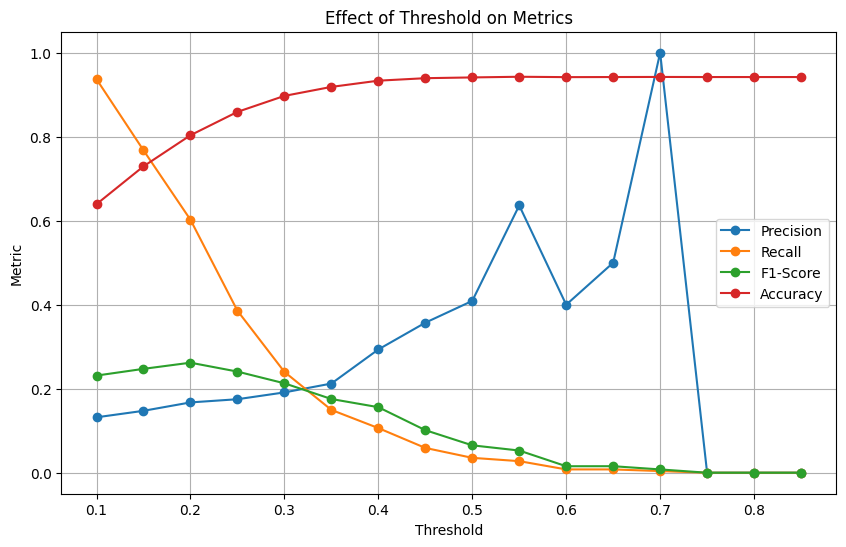

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, confusion_matrix

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)


results = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    results.append((threshold, precision, recall, f1, accuracy))


results = np.array(results)


print("Threshold | Precision | Recall | F1-Score | Accuracy")
for row in results:
    print(f"{row[0]:.2f}      | {row[1]:.2f}      | {row[2]:.2f}   | {row[3]:.2f}   | {row[4]:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], label="Precision", marker='o')
plt.plot(results[:, 0], results[:, 2], label="Recall", marker='o')
plt.plot(results[:, 0], results[:, 3], label="F1-Score", marker='o')
plt.plot(results[:, 0], results[:, 4], label="Accuracy", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Metric")
plt.title("Effect of Threshold on Metrics")
plt.legend()
plt.grid()
plt.show()


In [129]:

optimal_threshold = 0.10
y_pred_xgb = (y_prob_xgb >= optimal_threshold).astype(int)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_xgb))


Confusion Matrix:
[[3271  862]
 [  70  184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      4133
           1       0.18      0.72      0.28       254

    accuracy                           0.79      4387
   macro avg       0.58      0.76      0.58      4387
weighted avg       0.93      0.79      0.84      4387


ROC AUC Score:
0.8437837570085979


In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score


scorers = {
    'F1-Score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score),
    'ROC AUC': make_scorer(roc_auc_score, needs_proba=True)
}


for metric_name, scorer in scorers.items():
    scores = cross_val_score(
        model, X_train, y_train, scoring=scorer, cv=5  # 5-fold Cross-Validation
    )
    print(f"{metric_name} scores: {scores}")
    print(f"Mean {metric_name}: {scores.mean():.4f}")
    print(f"Standard Deviation {metric_name}: {scores.std():.4f}\n")



F1-Score scores: [0.         0.         0.         0.01666667 0.01652893]
Mean F1-Score: 0.0066
Standard Deviation F1-Score: 0.0081

Accuracy scores: [0.94235467 0.94235467 0.94186615 0.94235467 0.94186615]
Mean Accuracy: 0.9422
Standard Deviation Accuracy: 0.0002

ROC AUC scores: [0.83943995 0.8124676  0.79487168 0.81752327 0.82478904]
Mean ROC AUC: 0.8178
Standard Deviation ROC AUC: 0.0146



In [131]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 70),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    model = LGBMClassifier(random_state=42, **param)
    score = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='f1', cv=5).mean()
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best Parameters:", study.best_params)
print("Best f1 score:", study.best_value)


[I 2024-12-22 07:33:47,146] A new study created in memory with name: no-name-40c5886e-a35b-48df-a153-e971b36a0449


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:33:49,917] Trial 0 finished with value: 0.9602225832232442 and parameters: {'num_leaves': 28, 'learning_rate': 0.03347679035340304, 'n_estimators': 356, 'max_depth': 6, 'subsample': 0.8467943135690725, 'colsample_bytree': 0.9674106548428718, 'reg_alpha': 0.04716438269071388, 'reg_lambda': 0.05495686566157465}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:33:51,953] Trial 1 finished with value: 0.9571006995392792 and parameters: {'num_leaves': 32, 'learning_rate': 0.17473105954704346, 'n_estimators': 454, 'max_depth': 4, 'subsample': 0.9235515446873459, 'colsample_bytree': 0.8235402890240159, 'reg_alpha': 0.018133125368314684, 'reg_lambda': 0.4592817334908892}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:33:54,958] Trial 2 finished with value: 0.9589938475510879 and parameters: {'num_leaves': 20, 'learning_rate': 0.08571791034963587, 'n_estimators': 482, 'max_depth': 6, 'subsample': 0.8658046401946635, 'colsample_bytree': 0.9408118906808282, 'reg_alpha': 0.29903077422718227, 'reg_lambda': 0.7928879236972662}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:33:57,015] Trial 3 finished with value: 0.9581664750957579 and parameters: {'num_leaves': 61, 'learning_rate': 0.015567139788597003, 'n_estimators': 400, 'max_depth': 5, 'subsample': 0.9917073196118962, 'colsample_bytree': 0.8780770402137983, 'reg_alpha': 0.14822860627413392, 'reg_lambda': 0.5115699323507502}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:33:58,328] Trial 4 finished with value: 0.9600831214437662 and parameters: {'num_leaves': 25, 'learning_rate': 0.04140887204178752, 'n_estimators': 217, 'max_depth': 5, 'subsample': 0.8689571763475119, 'colsample_bytree': 0.836781501135747, 'reg_alpha': 0.9033343575044925, 'reg_lambda': 0.21573185397694605}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:33:59,129] Trial 5 finished with value: 0.8913996787523875 and parameters: {'num_leaves': 51, 'learning_rate': 0.017780832333050705, 'n_estimators': 176, 'max_depth': 3, 'subsample': 0.8495125160350817, 'colsample_bytree': 0.8565195880049059, 'reg_alpha': 0.5912620350952613, 'reg_lambda': 0.9207825779368186}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:01,249] Trial 6 finished with value: 0.9592496591057156 and parameters: {'num_leaves': 32, 'learning_rate': 0.10048272086809285, 'n_estimators': 248, 'max_depth': 7, 'subsample': 0.863078553272568, 'colsample_bytree': 0.9639422670636398, 'reg_alpha': 0.9375350089738644, 'reg_lambda': 0.07222532276117521}. Best is trial 0 with value: 0.9602225832232442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:03,980] Trial 7 finished with value: 0.9604898540188854 and parameters: {'num_leaves': 34, 'learning_rate': 0.03246164192357406, 'n_estimators': 378, 'max_depth': 6, 'subsample': 0.8942471970136259, 'colsample_bytree': 0.8427505435429458, 'reg_alpha': 0.9439728796055596, 'reg_lambda': 0.9155815638146642}. Best is trial 7 with value: 0.9604898540188854.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:04,828] Trial 8 finished with value: 0.9607901109792876 and parameters: {'num_leaves': 29, 'learning_rate': 0.1890690766221353, 'n_estimators': 206, 'max_depth': 3, 'subsample': 0.8187507331952765, 'colsample_bytree': 0.8775609280572131, 'reg_alpha': 0.7457587075363733, 'reg_lambda': 0.128699676710179}. Best is trial 8 with value: 0.9607901109792876.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:06,850] Trial 9 finished with value: 0.9578161491925238 and parameters: {'num_leaves': 28, 'learning_rate': 0.12645259713238496, 'n_estimators': 353, 'max_depth': 5, 'subsample': 0.9447132056500661, 'colsample_bytree': 0.8075092348023505, 'reg_alpha': 0.7487566014954571, 'reg_lambda': 0.39240395697598474}. Best is trial 8 with value: 0.9607901109792876.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:07,457] Trial 10 finished with value: 0.9616316590331785 and parameters: {'num_leaves': 44, 'learning_rate': 0.19173071517698048, 'n_estimators': 105, 'max_depth': 3, 'subsample': 0.8145481870978137, 'colsample_bytree': 0.9168865174404506, 'reg_alpha': 0.4838276922221133, 'reg_lambda': 0.2833369118440922}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:08,079] Trial 11 finished with value: 0.9612496567007861 and parameters: {'num_leaves': 45, 'learning_rate': 0.1993320794210218, 'n_estimators': 106, 'max_depth': 3, 'subsample': 0.8014148443923548, 'colsample_bytree': 0.9102415443252095, 'reg_alpha': 0.4783563624113918, 'reg_lambda': 0.27310536472345526}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2024-12-22 07:34:08,694] Trial 12 finished with value: 0.9609683403415291 and parameters: {'num_leaves': 48, 'learning_rate': 0.1523777902219277, 'n_estimators': 111, 'max_depth': 3, 'subsample': 0.8010501164915194, 'colsample_bytree': 0.9206030776233644, 'reg_alpha': 0.3880268516201778, 'reg_lambda': 0.29684278791293023}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:09,408] Trial 13 finished with value: 0.9606959810736946 and parameters: {'num_leaves': 42, 'learning_rate': 0.19924073058338096, 'n_estimators': 102, 'max_depth': 4, 'subsample': 0.8194318491685253, 'colsample_bytree': 0.9099607662881076, 'reg_alpha': 0.525738017659918, 'reg_lambda': 0.6239637317421296}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with 

[I 2024-12-22 07:34:10,265] Trial 14 finished with value: 0.9604895367477484 and parameters: {'num_leaves': 57, 'learning_rate': 0.15376084273752416, 'n_estimators': 146, 'max_depth': 4, 'subsample': 0.8038190046929474, 'colsample_bytree': 0.9972191213272054, 'reg_alpha': 0.36573802632402197, 'reg_lambda': 0.30400605791410695}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:11,295] Trial 15 finished with value: 0.9613573723650795 and parameters: {'num_leaves': 43, 'learning_rate': 0.1629838881181964, 'n_estimators': 275, 'max_depth': 3, 'subsample': 0.8332630894773344, 'colsample_bytree': 0.8883199459196618, 'reg_alpha': 0.6101009572124703, 'reg_lambda': 0.5992426134484123}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:12,644] Trial 16 finished with value: 0.9591779535795795 and parameters: {'num_leaves': 69, 'learning_rate': 0.15986476498808377, 'n_estimators': 286, 'max_depth': 4, 'subsample': 0.8355194734326903, 'colsample_bytree': 0.8794717014115147, 'reg_alpha': 0.7035744881828203, 'reg_lambda': 0.6587696731914185}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:34:13,747] Trial 17 finished with value: 0.961211767175693 and parameters: {'num_leaves': 40, 'learning_rate': 0.13056182078343148, 'n_estimators': 297, 'max_depth': 3, 'subsample': 0.893554242066983, 'colsample_bytree': 0.9283666059380967, 'reg_alpha': 0.23930025504938646, 'reg_lambda': 0.6311543847432555}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:14,945] Trial 18 finished with value: 0.9591766570929192 and parameters: {'num_leaves': 38, 'learning_rate': 0.17353102469470655, 'n_estimators': 250, 'max_depth': 4, 'subsample': 0.8290324513460116, 'colsample_bytree': 0.888596332150386, 'reg_alpha': 0.6180100581374703, 'reg_lambda': 0.7526216014658369}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:15,663] Trial 19 finished with value: 0.957143326824142 and parameters: {'num_leaves': 53, 'learning_rate': 0.06862310323352862, 'n_estimators': 160, 'max_depth': 3, 'subsample': 0.9135567079579543, 'colsample_bytree': 0.9416225279922472, 'reg_alpha': 0.4571129970996987, 'reg_lambda': 0.46653739902206925}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:34:18,094] Trial 20 finished with value: 0.9573067366851342 and parameters: {'num_leaves': 61, 'learning_rate': 0.13016065223555898, 'n_estimators': 423, 'max_depth': 5, 'subsample': 0.9690607467392919, 'colsample_bytree': 0.8627005976147365, 'reg_alpha': 0.6547655469322254, 'reg_lambda': 0.5708781953075495}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:18,765] Trial 21 finished with value: 0.9609517502828988 and parameters: {'num_leaves': 45, 'learning_rate': 0.19852211744451081, 'n_estimators': 125, 'max_depth': 3, 'subsample': 0.8046962260255892, 'colsample_bytree': 0.9051428446031198, 'reg_alpha': 0.4799699096526457, 'reg_lambda': 0.3251356920180378}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:19,658] Trial 22 finished with value: 0.9611495575882044 and parameters: {'num_leaves': 46, 'learning_rate': 0.179910919999357, 'n_estimators': 194, 'max_depth': 3, 'subsample': 0.8373098628729096, 'colsample_bytree': 0.9066574080338963, 'reg_alpha': 0.8267835836659658, 'reg_lambda': 0.19180711323133404}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:20,524] Trial 23 finished with value: 0.9607477609767546 and parameters: {'num_leaves': 38, 'learning_rate': 0.16592903642176832, 'n_estimators': 147, 'max_depth': 4, 'subsample': 0.817286133604746, 'colsample_bytree': 0.8913831175562276, 'reg_alpha': 0.5416827246467151, 'reg_lambda': 0.2028740571758903}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:21,491] Trial 24 finished with value: 0.9610584211325017 and parameters: {'num_leaves': 50, 'learning_rate': 0.14367386578988872, 'n_estimators': 241, 'max_depth': 3, 'subsample': 0.8741561665592836, 'colsample_bytree': 0.9320495577322377, 'reg_alpha': 0.400901827696755, 'reg_lambda': 0.34796193872598535}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:22,290] Trial 25 finished with value: 0.9605115356433517 and parameters: {'num_leaves': 43, 'learning_rate': 0.18685600456892537, 'n_estimators': 139, 'max_depth': 4, 'subsample': 0.8507482961733488, 'colsample_bytree': 0.9693507704204747, 'reg_alpha': 0.2706569470608248, 'reg_lambda': 0.010228612856563846}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:34:23,525] Trial 26 finished with value: 0.9595584020106971 and parameters: {'num_leaves': 36, 'learning_rate': 0.19923235993912414, 'n_estimators': 338, 'max_depth': 3, 'subsample': 0.8229223860218237, 'colsample_bytree': 0.9509499700805977, 'reg_alpha': 0.595780866002164, 'reg_lambda': 0.4070190231348586}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:24,630] Trial 27 finished with value: 0.9615212833660165 and parameters: {'num_leaves': 55, 'learning_rate': 0.11101817356976484, 'n_estimators': 276, 'max_depth': 3, 'subsample': 0.8833891803068687, 'colsample_bytree': 0.9170609237962539, 'reg_alpha': 0.4969398316303848, 'reg_lambda': 0.2476650901074947}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:26,126] Trial 28 finished with value: 0.9595874044370605 and parameters: {'num_leaves': 54, 'learning_rate': 0.11864064471880885, 'n_estimators': 318, 'max_depth': 4, 'subsample': 0.8760631695936525, 'colsample_bytree': 0.8601489764178887, 'reg_alpha': 0.8282816001150284, 'reg_lambda': 0.5375038949146287}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:29,003] Trial 29 finished with value: 0.9584306458560283 and parameters: {'num_leaves': 57, 'learning_rate': 0.10615643131223079, 'n_estimators': 295, 'max_depth': 7, 'subsample': 0.9345343533281231, 'colsample_bytree': 0.9219215393066087, 'reg_alpha': 0.09843751459768968, 'reg_lambda': 0.7324350513709632}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:30,112] Trial 30 finished with value: 0.9604912813365942 and parameters: {'num_leaves': 69, 'learning_rate': 0.06336571653037615, 'n_estimators': 270, 'max_depth': 3, 'subsample': 0.8832814377622077, 'colsample_bytree': 0.8965713829047537, 'reg_alpha': 0.6675912993003216, 'reg_lambda': 0.12009995405101301}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:31,099] Trial 31 finished with value: 0.9611595924480261 and parameters: {'num_leaves': 47, 'learning_rate': 0.14505582837099906, 'n_estimators': 224, 'max_depth': 3, 'subsample': 0.8352550531626679, 'colsample_bytree': 0.9147863520869854, 'reg_alpha': 0.44921486994733517, 'reg_lambda': 0.24256400465633116}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:31,991] Trial 32 finished with value: 0.9613563557806446 and parameters: {'num_leaves': 42, 'learning_rate': 0.16839921549814268, 'n_estimators': 194, 'max_depth': 3, 'subsample': 0.8539587287965694, 'colsample_bytree': 0.8971099036818285, 'reg_alpha': 0.546643564527553, 'reg_lambda': 0.4188100091884166}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:33,216] Trial 33 finished with value: 0.9600499236967461 and parameters: {'num_leaves': 43, 'learning_rate': 0.17055317601900033, 'n_estimators': 186, 'max_depth': 4, 'subsample': 0.8529388382286122, 'colsample_bytree': 0.8947733398679065, 'reg_alpha': 0.5623776920784824, 'reg_lambda': 0.4016846686077902}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:34,612] Trial 34 finished with value: 0.9598134662525668 and parameters: {'num_leaves': 64, 'learning_rate': 0.1835933375896584, 'n_estimators': 323, 'max_depth': 3, 'subsample': 0.9110133679192796, 'colsample_bytree': 0.8742075790482617, 'reg_alpha': 0.3344018541862849, 'reg_lambda': 0.4464686890881241}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:35,739] Trial 35 finished with value: 0.9608573930676515 and parameters: {'num_leaves': 41, 'learning_rate': 0.08449326652461665, 'n_estimators': 171, 'max_depth': 4, 'subsample': 0.8428541807358056, 'colsample_bytree': 0.9399929103228299, 'reg_alpha': 0.5340631158061022, 'reg_lambda': 0.5640175744801017}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-22 07:34:38,226] Trial 36 finished with value: 0.9575634104882085 and parameters: {'num_leaves': 49, 'learning_rate': 0.1457039072656143, 'n_estimators': 265, 'max_depth': 6, 'subsample': 0.8559939069488132, 'colsample_bytree': 0.9548534955825247, 'reg_alpha': 0.20219598830261898, 'reg_lambda': 0.48552244283225954}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:34:39,368] Trial 37 finished with value: 0.9611587114422335 and parameters: {'num_leaves': 20, 'learning_rate': 0.1626836180973249, 'n_estimators': 226, 'max_depth': 3, 'subsample': 0.867615530699253, 'colsample_bytree': 0.8692236102785256, 'reg_alpha': 0.6408076852702879, 'reg_lambda': 0.8461010238718161}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:40,928] Trial 38 finished with value: 0.9613567048908308 and parameters: {'num_leaves': 53, 'learning_rate': 0.10853706304937558, 'n_estimators': 384, 'max_depth': 3, 'subsample': 0.8874584988839114, 'colsample_bytree': 0.8453563752879679, 'reg_alpha': 0.4466628904101665, 'reg_lambda': 0.3518737080807654}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:43,288] Trial 39 finished with value: 0.9585109728736864 and parameters: {'num_leaves': 56, 'learning_rate': 0.10039887006139474, 'n_estimators': 468, 'max_depth': 4, 'subsample': 0.9039704059566904, 'colsample_bytree': 0.8480965324258694, 'reg_alpha': 0.4219144746802369, 'reg_lambda': 0.15410334055608674}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:46,724] Trial 40 finished with value: 0.9575607096941774 and parameters: {'num_leaves': 51, 'learning_rate': 0.11690110586037282, 'n_estimators': 498, 'max_depth': 5, 'subsample': 0.8875822862887393, 'colsample_bytree': 0.8176001381746112, 'reg_alpha': 0.3355548810060212, 'reg_lambda': 0.2504578084378421}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:48,375] Trial 41 finished with value: 0.9614492002499453 and parameters: {'num_leaves': 60, 'learning_rate': 0.0899361995011041, 'n_estimators': 388, 'max_depth': 3, 'subsample': 0.8574474651858814, 'colsample_bytree': 0.8375960800282625, 'reg_alpha': 0.5013462849375634, 'reg_lambda': 0.35993383699673503}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-12-22 07:34:50,379] Trial 42 finished with value: 0.9610774588799437 and parameters: {'num_leaves': 60, 'learning_rate': 0.08475705266809452, 'n_estimators': 430, 'max_depth': 3, 'subsample': 0.8608513803025679, 'colsample_bytree': 0.8300620714906315, 'reg_alpha': 0.5049345018092869, 'reg_lambda': 0.3506913055018376}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:52,343] Trial 43 finished with value: 0.9610955148165168 and parameters: {'num_leaves': 64, 'learning_rate': 0.0653058801636493, 'n_estimators': 380, 'max_depth': 3, 'subsample': 0.8808691489102658, 'colsample_bytree': 0.8017227747064763, 'reg_alpha': 0.4333249083779856, 'reg_lambda': 0.36350796637420246}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:54,227] Trial 44 finished with value: 0.9614173370243446 and parameters: {'num_leaves': 53, 'learning_rate': 0.09312456234091092, 'n_estimators': 377, 'max_depth': 3, 'subsample': 0.9235337167236668, 'colsample_bytree': 0.851196191487033, 'reg_alpha': 0.5889665381990146, 'reg_lambda': 0.07651817118945137}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:56,218] Trial 45 finished with value: 0.9613145398355389 and parameters: {'num_leaves': 65, 'learning_rate': 0.09183425869826992, 'n_estimators': 354, 'max_depth': 3, 'subsample': 0.9297037881505611, 'colsample_bytree': 0.8199063361590312, 'reg_alpha': 0.7395105274817588, 'reg_lambda': 0.06403934145732293}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:34:58,378] Trial 46 finished with value: 0.9612839647319864 and parameters: {'num_leaves': 59, 'learning_rate': 0.09216056267562721, 'n_estimators': 405, 'max_depth': 3, 'subsample': 0.9533176061490983, 'colsample_bytree': 0.8344779893583663, 'reg_alpha': 0.575890009643645, 'reg_lambda': 0.003658110563847905}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:35:00,464] Trial 47 finished with value: 0.9605641060690331 and parameters: {'num_leaves': 55, 'learning_rate': 0.07335991013839854, 'n_estimators': 425, 'max_depth': 4, 'subsample': 0.995546539095083, 'colsample_bytree': 0.8845511811575645, 'reg_alpha': 0.7010701704775034, 'reg_lambda': 0.10117654149175526}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 07:35:03,880] Trial 48 finished with value: 0.9593012164372953 and parameters: {'num_leaves': 52, 'learning_rate': 0.05416185797993796, 'n_estimators': 365, 'max_depth': 7, 'subsample': 0.8129501081075446, 'colsample_bytree': 0.8689152131674207, 'reg_alpha': 0.5051518529158607, 'reg_lambda': 0.14700143894632278}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7714, number of negative: 7713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 15427, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500032 -> initscore=0.000130
[LightGBM] [Info] Start training from score 0.000130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-12-22 07:35:05,652] Trial 49 finished with value: 0.9611756465624597 and parameters: {'num_leaves': 58, 'learning_rate': 0.04663086423783146, 'n_estimators': 442, 'max_depth': 3, 'subsample': 0.9174524624334452, 'colsample_bytree': 0.8524828527208497, 'reg_alpha': 0.6129438688552152, 'reg_lambda': 0.2679072320899291}. Best is trial 10 with value: 0.9616316590331785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [132]:

best_lgbm_params = {
    'num_leaves': 44,
    'learning_rate': 0.19173071517698048,
    'n_estimators': 105,
    'max_depth': 3,
    'subsample': 0.8145481870978137,
    'colsample_bytree':  0.9168865174404506,
    'reg_alpha': 0.4838276922221133,
    'reg_lambda': 0.2833369118440922
}

optimized_model = LGBMClassifier(random_state=42, **best_lgbm_params)

optimized_model.fit(X_train_resampled, y_train_resampled)


y_pred_lgb = optimized_model.predict(X_test)
y_prob_lgb = optimized_model.predict_proba(X_test)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9642, number of negative: 9642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 19284, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [133]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix


y_prob_lgb = optimized_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results_lgbm = []


for threshold in thresholds:
    y_pred_thresh = (y_prob_lgb >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results_lgbm.append((threshold, precision, recall, f1, accuracy))

# چاپ نتایج
print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results_lgbm:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


optimal_threshold_lgbm = max(results_lgbm, key=lambda x: x[3])[0]
print(f"\nOptimal Threshold for LightGBM: {optimal_threshold_lgbm:.2f}")

y_pred_lgb = (y_prob_lgb >= optimal_threshold_lgbm).astype(int)


print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_lgb))

precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
accuracy = accuracy_score(y_test, y_pred_lgb)

print(f"\nOptimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.16      | 0.86   | 0.27   | 0.73
0.15      | 0.20      | 0.69   | 0.30   | 0.82
0.20      | 0.22      | 0.52   | 0.31   | 0.87
0.25      | 0.24      | 0.33   | 0.28   | 0.90
0.30      | 0.24      | 0.18   | 0.21   | 0.92
0.35      | 0.26      | 0.10   | 0.15   | 0.93
0.40      | 0.26      | 0.05   | 0.08   | 0.94
0.45      | 0.22      | 0.02   | 0.04   | 0.94
0.50      | 0.25      | 0.01   | 0.02   | 0.94
0.55      | 0.50      | 0.00   | 0.01   | 0.94
0.60      | 1.00      | 0.00   | 0.01   | 0.94
0.65      | 0.00      | 0.00   | 0.00   | 0.94
0.70      | 0.00      | 0.00   | 0.00   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94

Optimal Threshold for LightGBM: 0.20

Confusion Matrix with Optimal Threshold:
[[3678  455]
 [ 123  131]]

Classification Report with Optimal Threshold:
              precision    recall  f1-sco

In [134]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


et_model = ExtraTreesClassifier(random_state=42, class_weight='balanced')

et_model.fit(X_train_resampled, y_train_resampled)


y_pred = et_model.predict(X_test)
y_prob = et_model.predict_proba(X_test)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[4080   53]
 [ 235   19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4133
           1       0.26      0.07      0.12       254

    accuracy                           0.93      4387
   macro avg       0.60      0.53      0.54      4387
weighted avg       0.91      0.93      0.92      4387


ROC AUC Score:
0.8198278309210865


In [559]:
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.14      | 0.87   | 0.23   | 0.67
0.15      | 0.15      | 0.67   | 0.24   | 0.76
0.20      | 0.16      | 0.50   | 0.25   | 0.82
0.25      | 0.17      | 0.34   | 0.23   | 0.87
0.30      | 0.18      | 0.21   | 0.19   | 0.90
0.35      | 0.21      | 0.16   | 0.18   | 0.92
0.40      | 0.22      | 0.11   | 0.14   | 0.93
0.45      | 0.28      | 0.08   | 0.12   | 0.93
0.50      | 0.33      | 0.06   | 0.09   | 0.94
0.55      | 0.40      | 0.04   | 0.07   | 0.94
0.60      | 0.53      | 0.03   | 0.06   | 0.94
0.65      | 0.57      | 0.02   | 0.03   | 0.94
0.70      | 0.75      | 0.01   | 0.02   | 0.94
0.75      | 1.00      | 0.01   | 0.02   | 0.94
0.80      | 1.00      | 0.01   | 0.02   | 0.94
0.85      | 1.00      | 0.01   | 0.02   | 0.94


In [138]:
optimal_threshold = 0.2
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)


print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_optimal))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))



Confusion Matrix with Optimal Threshold:
[[3296  837]
 [  96  158]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      4133
           1       0.16      0.62      0.25       254

    accuracy                           0.79      4387
   macro avg       0.57      0.71      0.56      4387
weighted avg       0.92      0.79      0.84      4387



In [139]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    scoring='f1',
    n_iter=50, 
    cv=5,  
    random_state=42,
    verbose=2,
    n_jobs=-1
)


random_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", random_search.best_params_)
print("Best f1 score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best f1 score: 0.9775629482904247


In [140]:
best_et_params = random_search.best_params_

optimized_et_model = ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params)
optimized_et_model.fit(X_train_resampled, y_train_resampled)


y_prob_opt = optimized_et_model.predict_proba(X_test)[:, 1]
y_pred_opt = optimized_et_model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_opt))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_opt))


Confusion Matrix:
[[4086   47]
 [ 236   18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4133
           1       0.28      0.07      0.11       254

    accuracy                           0.94      4387
   macro avg       0.61      0.53      0.54      4387
weighted avg       0.91      0.94      0.92      4387


ROC AUC Score:
0.821914454620102


In [141]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

y_prob_et = optimized_et_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob_et >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


optimal_threshold = max(results, key=lambda x: x[3])[0]  
print(f"\nOptimal Threshold: {optimal_threshold:.2f}")


y_pred_et = (y_prob_et >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_et))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_et))

precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
accuracy = accuracy_score(y_test, y_pred_et)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.91   | 0.23   | 0.65
0.15      | 0.15      | 0.75   | 0.24   | 0.73
0.20      | 0.16      | 0.61   | 0.25   | 0.79
0.25      | 0.17      | 0.45   | 0.24   | 0.84
0.30      | 0.17      | 0.30   | 0.22   | 0.88
0.35      | 0.19      | 0.20   | 0.20   | 0.90
0.40      | 0.21      | 0.15   | 0.17   | 0.92
0.45      | 0.24      | 0.09   | 0.14   | 0.93
0.50      | 0.28      | 0.07   | 0.11   | 0.94
0.55      | 0.37      | 0.06   | 0.11   | 0.94
0.60      | 0.35      | 0.04   | 0.06   | 0.94
0.65      | 0.38      | 0.02   | 0.04   | 0.94
0.70      | 0.40      | 0.01   | 0.02   | 0.94
0.75      | 0.50      | 0.01   | 0.02   | 0.94
0.80      | 1.00      | 0.01   | 0.02   | 0.94
0.85      | 1.00      | 0.01   | 0.02   | 0.94

Optimal Threshold: 0.20

Confusion Matrix with Optimal Threshold:
[[3324  809]
 [  99  155]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support


Model Comparison:
               Precision  Recall  F1-Score  Accuracy  ROC AUC
Random Forest       0.17    0.52      0.26      0.82     0.83
Extra Trees         0.16    0.61      0.25      0.79     0.82
LightGBM            0.22    0.52      0.31      0.87     0.86
XGBoost             0.18    0.72      0.28      0.79     0.84


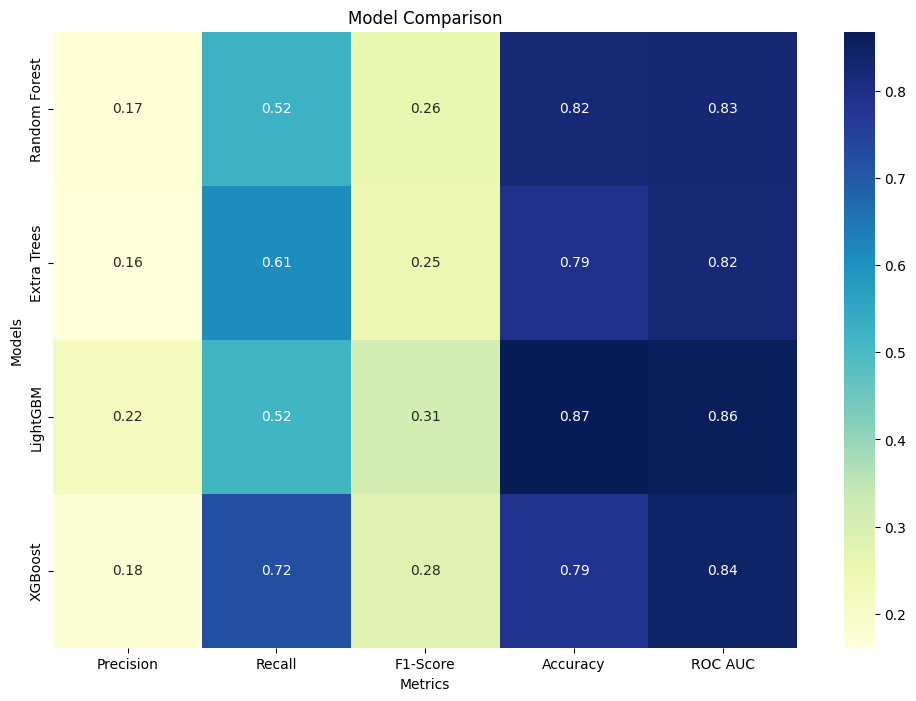

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


comparison_results = {}


comparison_results['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}


comparison_results['Extra Trees'] = {
    'Precision': precision_score(y_test, y_pred_et),
    'Recall': recall_score(y_test, y_pred_et),
    'F1-Score': f1_score(y_test, y_pred_et),
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'ROC AUC': roc_auc_score(y_test, y_prob_et)
}


comparison_results['LightGBM'] = {
    'Precision': precision_score(y_test, y_pred_lgb),
    'Recall': recall_score(y_test, y_pred_lgb),
    'F1-Score': f1_score(y_test, y_pred_lgb),
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_lgb)
}


comparison_results['XGBoost'] = {
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
}


comparison_df = pd.DataFrame(comparison_results).T


print("Model Comparison:")
print(comparison_df)


plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.show()


Cross-validating: Random Forest
Random Forest -> F1 Scores: [0.8747816  0.99355504 0.99535604 0.99330587 0.99355836]
Random Forest -> Mean f1: 0.9701, Std f1: 0.0477
Cross-validating: Extra Trees
Extra Trees -> F1 Scores: [0.92558783 0.98896021 0.99305019 0.99125064 0.98896587]
Extra Trees -> Mean f1: 0.9776, Std f1: 0.0260
Cross-validating: LightGBM
LightGBM -> F1 Scores: [0.81645181 0.99689119 0.99792531 0.998187   0.99870298]
LightGBM -> Mean f1: 0.9616, Std f1: 0.0726
Cross-validating: XGBoost
XGBoost -> F1 Scores: [0.81608842 0.99714952 0.99818418 0.99534643 0.99766537]
XGBoost -> Mean f1: 0.9609, Std f1: 0.0724

Cross-Validation Results:
               Mean f1  Std f1
Random Forest     0.97    0.05
Extra Trees       0.98    0.03
LightGBM          0.96    0.07
XGBoost           0.96    0.07


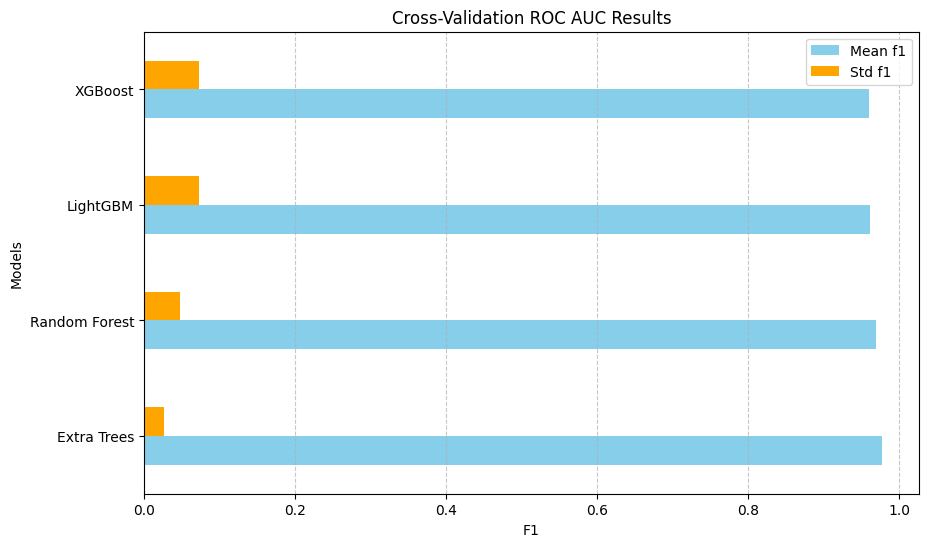

In [143]:
from sklearn.model_selection import cross_val_score
import numpy as np


models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params),
    "Extra Trees": ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params),
    "LightGBM": LGBMClassifier(random_state=42, **best_lgbm_params),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_xgb_params)
}


cv_results = {}
f1_scores = {}

cv_folds = 5

for model_name, model in models.items():
    print(f"Cross-validating: {model_name}")
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv_folds, scoring='f1', n_jobs=-1)
    f1_scores[model_name] = scores  
    print(f"{model_name} -> F1 Scores: {scores}")
    cv_results[model_name] = {
        "Mean f1": np.mean(scores),
        "Std f1": np.std(scores)
    }
    print(f"{model_name} -> Mean f1: {np.mean(scores):.4f}, Std f1: {np.std(scores):.4f}")


cv_results_df = pd.DataFrame(cv_results).T


print("\nCross-Validation Results:")
print(cv_results_df)


cv_results_df.sort_values("Mean f1", ascending=False, inplace=True)
cv_results_df.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Cross-Validation ROC AUC Results")
plt.xlabel("F1")
plt.ylabel("Models")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [144]:
from scipy.stats import ttest_rel, f_oneway
import pandas as pd


f1_rf_scores = [0.8747816 , 0.99355504, 0.99535604, 0.99330587, 0.99355836]
f1_et_scores = [0.92558783, 0.98896021, 0.99305019, 0.99125064, 0.98896587]
f1_lgbm_scores = [0.81645181, 0.99689119, 0.99792531, 0.998187,   0.99870298]
f1_xgb_scores = [0.81608842, 0.99714952, 0.99818418, 0.99534643, 0.99766537]


f1_scores = {
    'Random Forest': f1_rf_scores,
    'Extra Trees': f1_et_scores,
    'LightGBM': f1_lgbm_scores,
    'XGBoost': f1_xgb_scores
}
results_df = pd.DataFrame(f1_scores)
print("Cross-Validation F1-Scores for Each Model:")
print(results_df)


anova_results = f_oneway(f1_rf_scores, f1_et_scores, f1_lgbm_scores, f1_xgb_scores)
print(f"\nANOVA Results: F-Statistic = {anova_results.statistic:.4f}, P-Value = {anova_results.pvalue:.4f}")


t_stat, p_value = ttest_rel(f1_rf_scores, f1_et_scores)
print(f"\nT-Test (Random Forest vs Extra Trees): T-Statistic = {t_stat:.4f}, P-Value = {p_value:.4f}")


Cross-Validation F1-Scores for Each Model:
   Random Forest  Extra Trees  LightGBM  XGBoost
0           0.87         0.93      0.82     0.82
1           0.99         0.99      1.00     1.00
2           1.00         0.99      1.00     1.00
3           0.99         0.99      1.00     1.00
4           0.99         0.99      1.00     1.00

ANOVA Results: F-Statistic = 0.0738, P-Value = 0.9732

T-Test (Random Forest vs Extra Trees): T-Statistic = -0.6866, P-Value = 0.5300


In [145]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params)
extra_trees_model = ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params)
lightgbm_model = LGBMClassifier(random_state=42, **best_lgbm_params)
best_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_xgb_params)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', random_forest_model),
        ('et', extra_trees_model),
        ('lgbm', lightgbm_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft', 
    weights=[1, 2, 4, 3] 
)

ensemble_model.fit(X_train_resampled, y_train_resampled)
y_pred_ensemble = ensemble_model.predict(X_test)

print("Confusion Matrix (Ensemble):")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9642, number of negative: 9642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 19284, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [146]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('rf', random_forest_model), 
    ('et', extra_trees_model), 
    ('lgbm', lightgbm_model), 
    ('xgb', best_xgb_model)
]

# Meta-model (e.g., Logistic Regression)
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=False,  # If True, original features are concatenated with predictions
    cv=5  # Cross-validation for stacking
)

# Fit the stacking model on training data
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred_stacking = stacking_clf.predict(X_test)
print("Confusion Matrix (Stacking):")
print(confusion_matrix(y_test, y_pred_stacking))
print("\nClassification Report (Stacking):")
print(classification_report(y_test, y_pred_stacking))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9642, number of negative: 9642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3679
[LightGBM] [Info] Number of data points in the train set: 19284, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

Model Comparison:
               Precision  Recall  F1-Score  Accuracy  ROC AUC
Random Forest       0.17    0.52      0.26      0.82     0.83
Extra Trees         0.16    0.61      0.25      0.79     0.82
LightGBM            0.22    0.52      0.31      0.87     0.86
XGBoost             0.18    0.72      0.28      0.79     0.84
Ensemble            0.22    0.61      0.32      0.85     0.86
Stacking            0.21    0.14      0.17      0.92     0.82


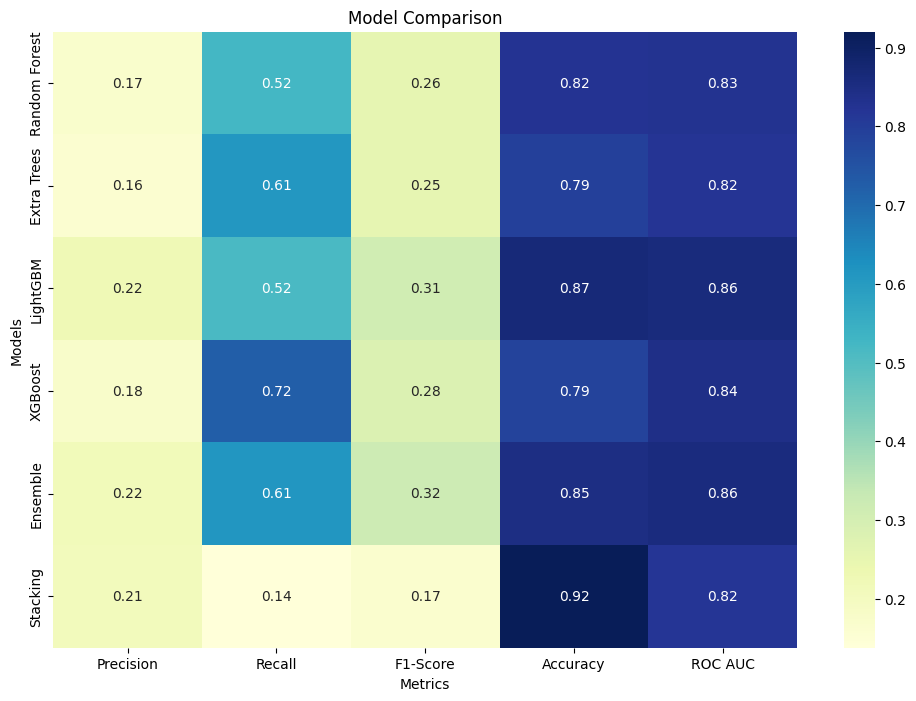

In [147]:
# Compare Voting and Stacking with individual models

y_prob_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
y_pred_ensemble = (y_prob_ensemble >= optimal_threshold).astype(int)

y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]
y_pred_stacking = (y_prob_stacking >= optimal_threshold).astype(int)


comparison_results = {}


comparison_results['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}


comparison_results['Extra Trees'] = {
    'Precision': precision_score(y_test, y_pred_et),
    'Recall': recall_score(y_test, y_pred_et),
    'F1-Score': f1_score(y_test, y_pred_et),
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'ROC AUC': roc_auc_score(y_test, y_prob_et)
}


comparison_results['LightGBM'] = {
    'Precision': precision_score(y_test, y_pred_lgb),
    'Recall': recall_score(y_test, y_pred_lgb),
    'F1-Score': f1_score(y_test, y_pred_lgb),
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_lgb)
}


comparison_results['XGBoost'] = {
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
}

comparison_results['Ensemble'] = {
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall': recall_score(y_test, y_pred_ensemble),
    'F1-Score': f1_score(y_test, y_pred_ensemble),
    'Accuracy': accuracy_score(y_test, y_pred_ensemble),
    'ROC AUC': roc_auc_score(y_test, y_prob_ensemble)
}

comparison_results['Stacking'] = {
    'Precision': precision_score(y_test, y_pred_stacking),
    'Recall': recall_score(y_test, y_pred_stacking),
    'F1-Score': f1_score(y_test, y_pred_stacking),
    'Accuracy': accuracy_score(y_test, y_pred_stacking),
    'ROC AUC': roc_auc_score(y_test, y_prob_stacking)
}


comparison_df = pd.DataFrame(comparison_results).T


print("Model Comparison:")
print(comparison_df)


plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.show()
